In [82]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [83]:
data = pd.read_csv("Walmart (1).csv")
data.head()

Store        Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0      1  05-02-2010    1643690.90             0        42.31       2.572   
1      1  12-02-2010    1641957.44             1        38.51       2.548   
2      1  19-02-2010    1611968.17             0        39.93       2.514   
3      1  26-02-2010    1409727.59             0        46.63       2.561   
4      1  05-03-2010    1554806.68             0        46.50       2.625   

          CPI  Unemployment  
0  211.096358         8.106  
1  211.242170         8.106  
2  211.289143         8.106  
3  211.319643         8.106  
4  211.350143         8.106

In [84]:
data.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [85]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [86]:
data['Date'] = pd.to_datetime(data['Date'])

In [87]:
data.shape

(6435, 8)

In [88]:
data['Store'].nunique()

45

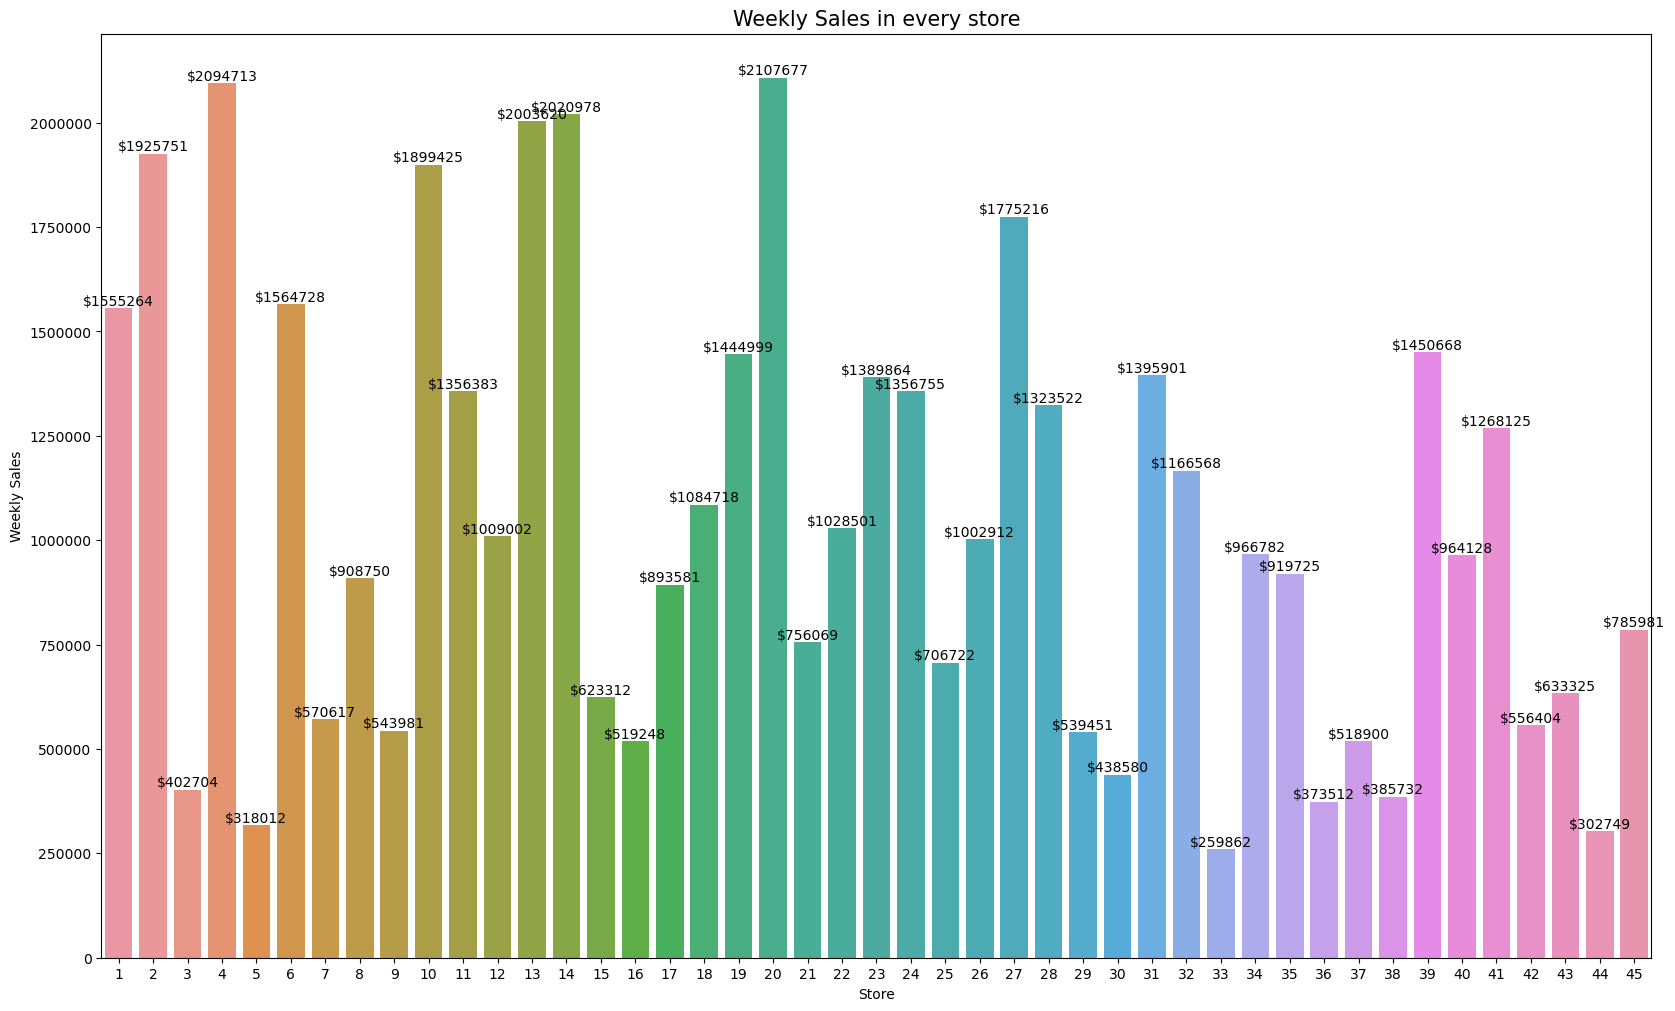

In [89]:
plt.subplots(figsize=(20,12))
ax = sns.barplot(data,x = 'Store',y = 'Weekly_Sales',ci = None)
ax.bar_label(ax.containers[0],fmt='$%.0f')
plt.ticklabel_format(useOffset=False,style='plain',axis='y')
plt.title("Weekly Sales in every store",fontsize = 15)
plt.ylabel("Weekly Sales")
plt.show()

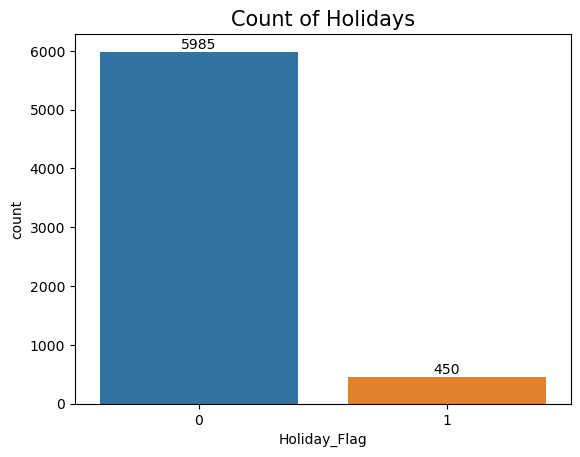

In [90]:
ax = sns.countplot(data, x = 'Holiday_Flag')
ax.bar_label(ax.containers[0])
plt.title("Count of Holidays",fontsize=15)
plt.show()

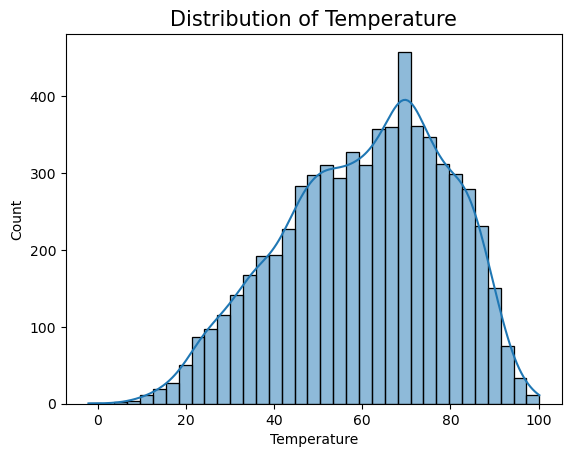

In [91]:
sns.histplot(data, x='Temperature',kde=True)
plt.title("Distribution of Temperature",fontsize=15)
plt.show()

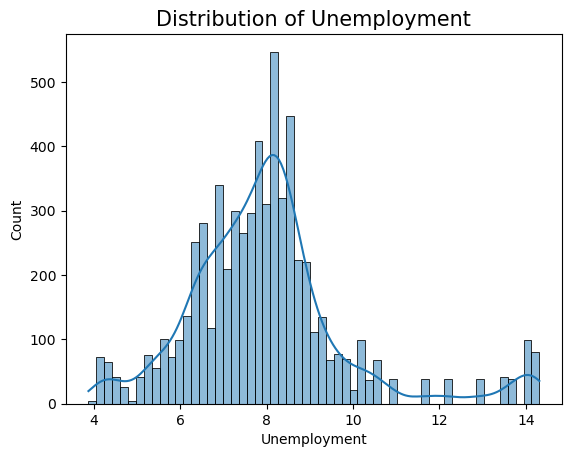

In [92]:
sns.histplot(data, x='Unemployment',kde=True)
plt.title("Distribution of Unemployment",fontsize=15)
plt.show()

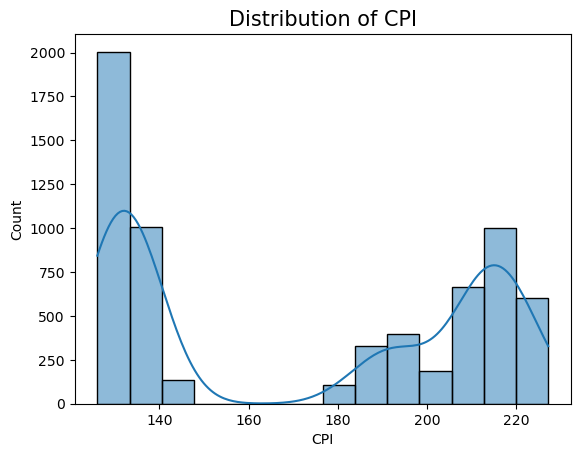

In [93]:
sns.histplot(data, x='CPI',kde=True)
plt.title("Distribution of CPI",fontsize=15)
plt.show()

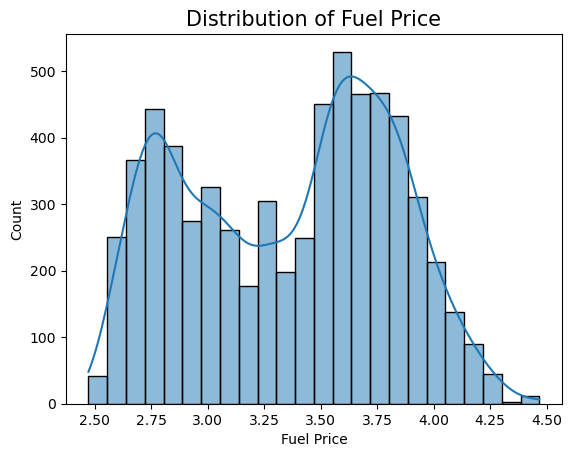

In [94]:
sns.histplot(data, x='Fuel_Price',kde=True)
plt.title("Distribution of Fuel Price",fontsize=15)
plt.xlabel("Fuel Price")
plt.show()

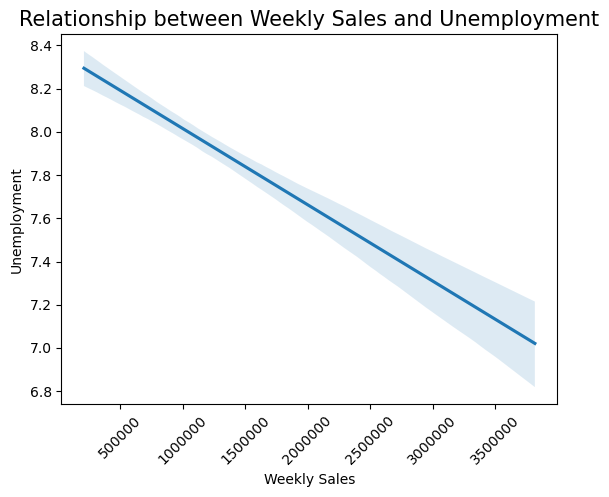

In [95]:
sns.regplot(data,x='Weekly_Sales',y = 'Unemployment',scatter=False)
plt.ticklabel_format(useOffset=False,style='plain',axis='x')
plt.xticks(rotation = 45)
plt.title("Relationship between Weekly Sales and Unemployment",fontsize = 15)
plt.xlabel("Weekly Sales")
plt.show()

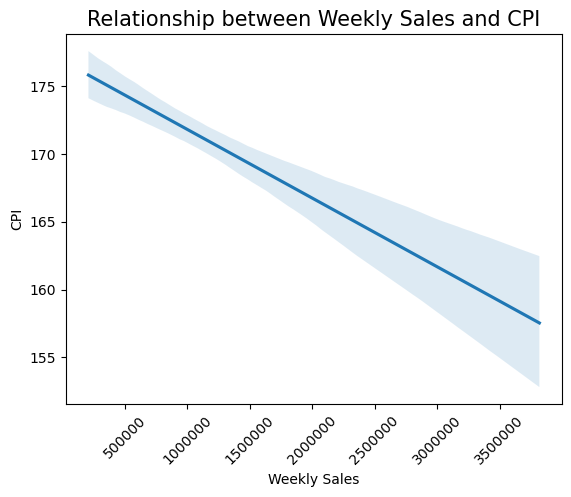

In [96]:
sns.regplot(data,x='Weekly_Sales',y = 'CPI',scatter=False)
plt.ticklabel_format(useOffset=False,style='plain',axis='x')
plt.xticks(rotation = 45)
plt.title("Relationship between Weekly Sales and CPI",fontsize = 15)
plt.xlabel("Weekly Sales")
plt.show()

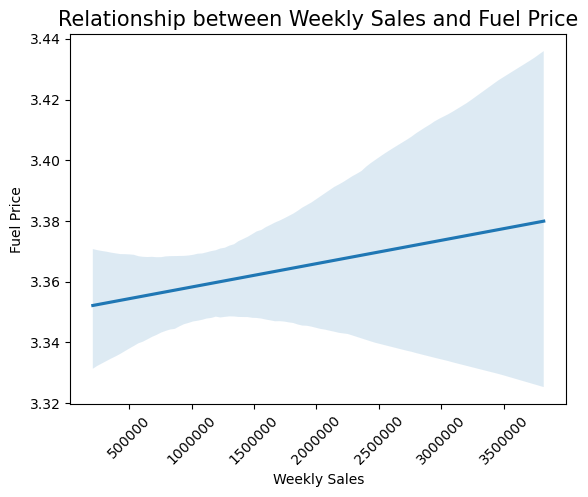

In [97]:
sns.regplot(data,x='Weekly_Sales',y = 'Fuel_Price',scatter=False)
plt.ticklabel_format(useOffset=False,style='plain',axis='x')
plt.xticks(rotation = 45)
plt.title("Relationship between Weekly Sales and Fuel Price",fontsize = 15)
plt.xlabel("Weekly Sales")
plt.ylabel("Fuel Price")
plt.show()

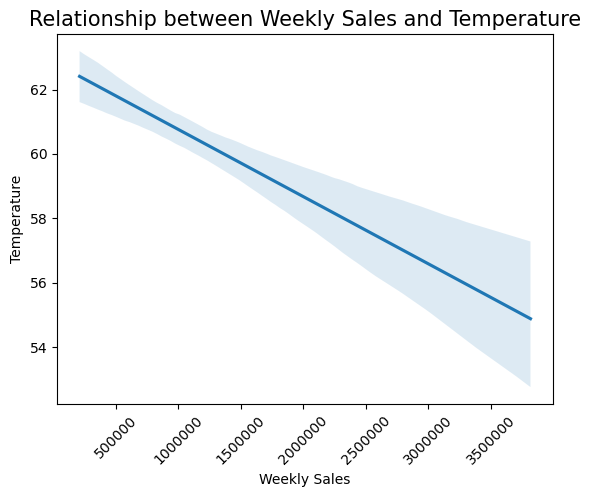

In [98]:
sns.regplot(data,x='Weekly_Sales',y = 'Temperature',scatter=False)
plt.ticklabel_format(useOffset=False,style='plain',axis='x')
plt.xticks(rotation = 45)
plt.title("Relationship between Weekly Sales and Temperature",fontsize = 15)
plt.xlabel("Weekly Sales")
plt.show()

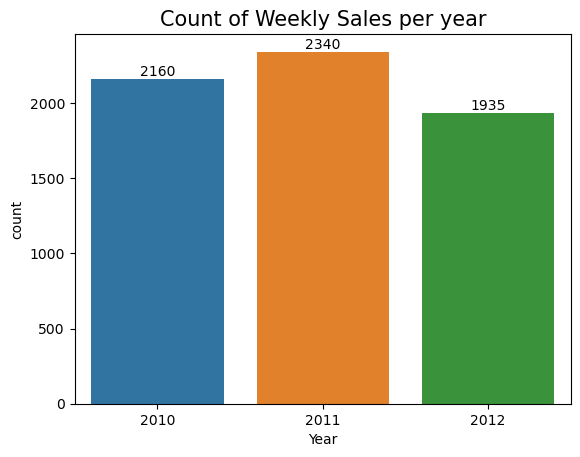

In [99]:
data['Year'] = data['Date'].dt.year
ax = sns.countplot(data,x='Year')
ax.bar_label(ax.containers[0])
plt.title("Count of Weekly Sales per year", fontsize = 15)
plt.show()

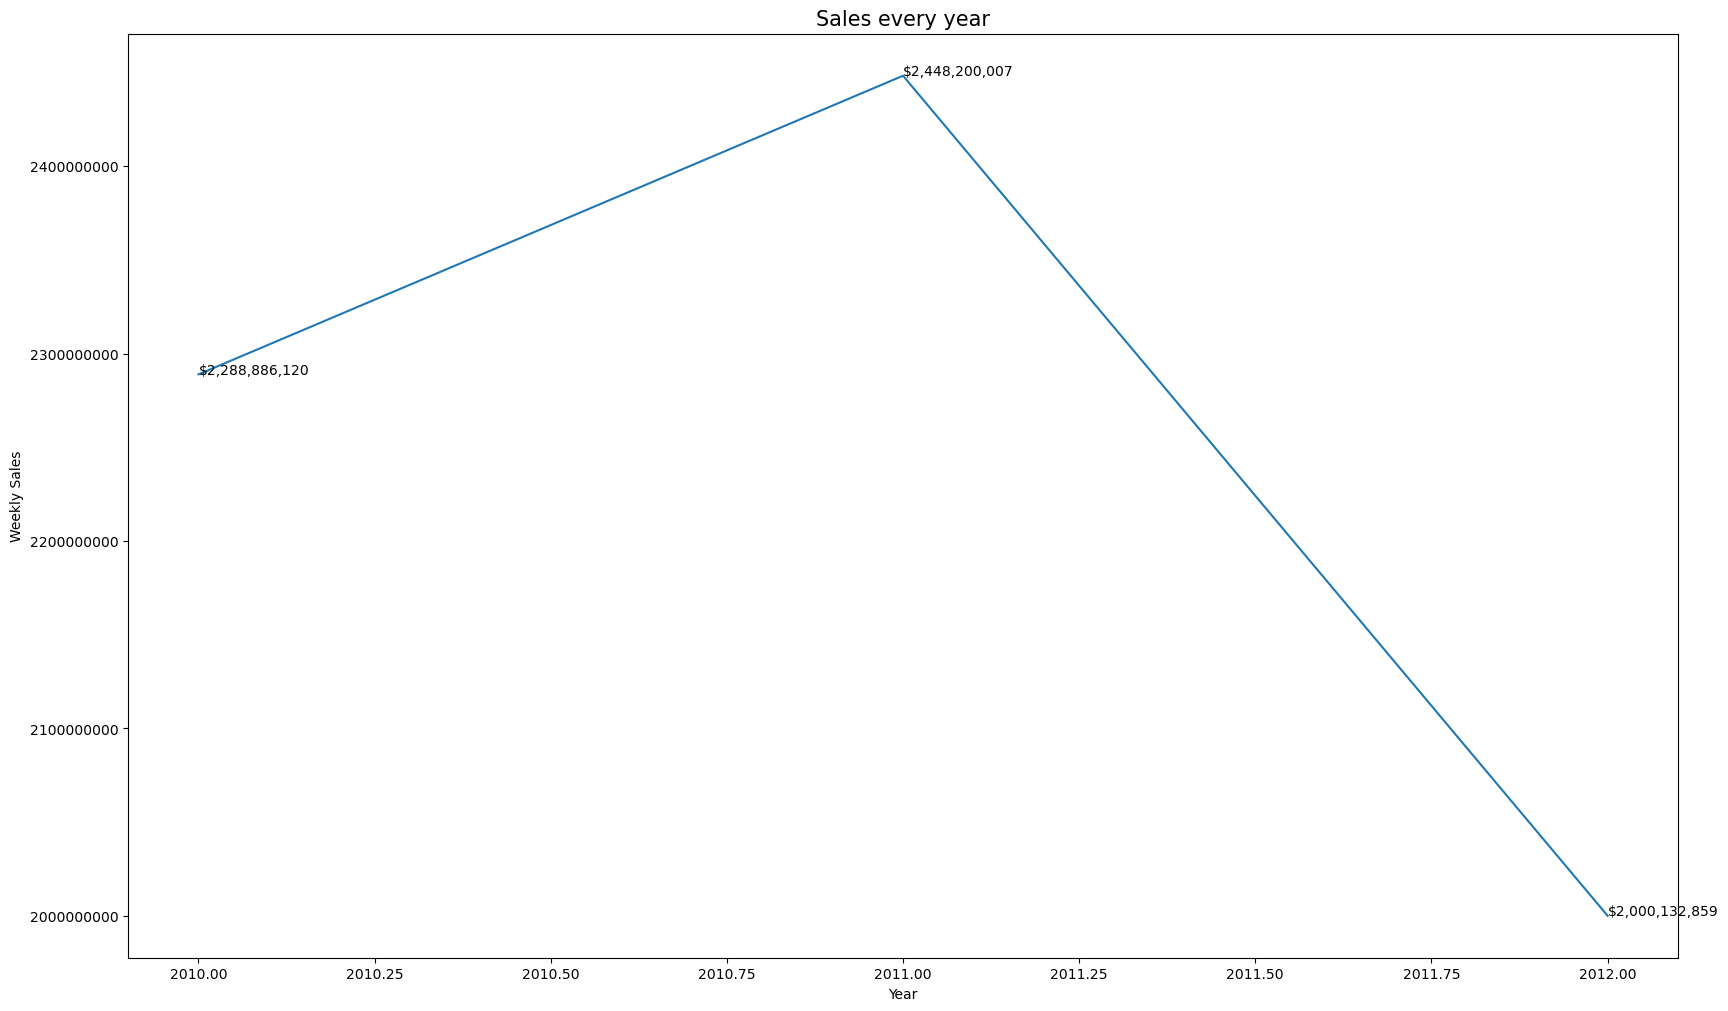

In [100]:
v0 = data.groupby('Year')['Weekly_Sales'].sum().reset_index()
plt.subplots(figsize = (20,12))
ax = sns.lineplot(v0,x = 'Year',y = 'Weekly_Sales')
for x,y in zip(v0['Year'],v0['Weekly_Sales']):
    plt.text(x = x, y = y, s = '${:,.0f}'.format(y))   
plt.ticklabel_format(useOffset=False,style='plain',axis='y')
plt.title("Sales every year",fontsize = 15)
plt.ylabel("Weekly Sales")
plt.show()

In [101]:
data['Month'] = data['Date'].dt.month
data['MonthName'] = data['Date'].dt.month_name()
data['Week'] = data['Date'].dt.week

In [102]:
data_2010 = data[data['Year']==2010].sort_values(by='Month')
data_2010.head()

Store       Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
3323     24 2010-01-10    1215273.20             0        66.88       2.840   
1607     12 2010-01-10     850936.26             0        85.20       3.001   
34        1 2010-01-10    1453329.50             0        71.89       2.603   
5611     40 2010-01-10     891152.33             0        62.01       2.717   
3895     28 2010-01-10    1203080.41             0        85.20       3.001   

             CPI  Unemployment  Year  Month MonthName  Week  
3323  132.756800         8.275  2010      1   January     1  
1607  126.234600        14.313  2010      1   January     1  
34    211.671989         7.838  2010      1   January     1  
5611  132.756800         5.287  2010      1   January     1  
3895  126.234600        14.313  2010      1   January     1

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should

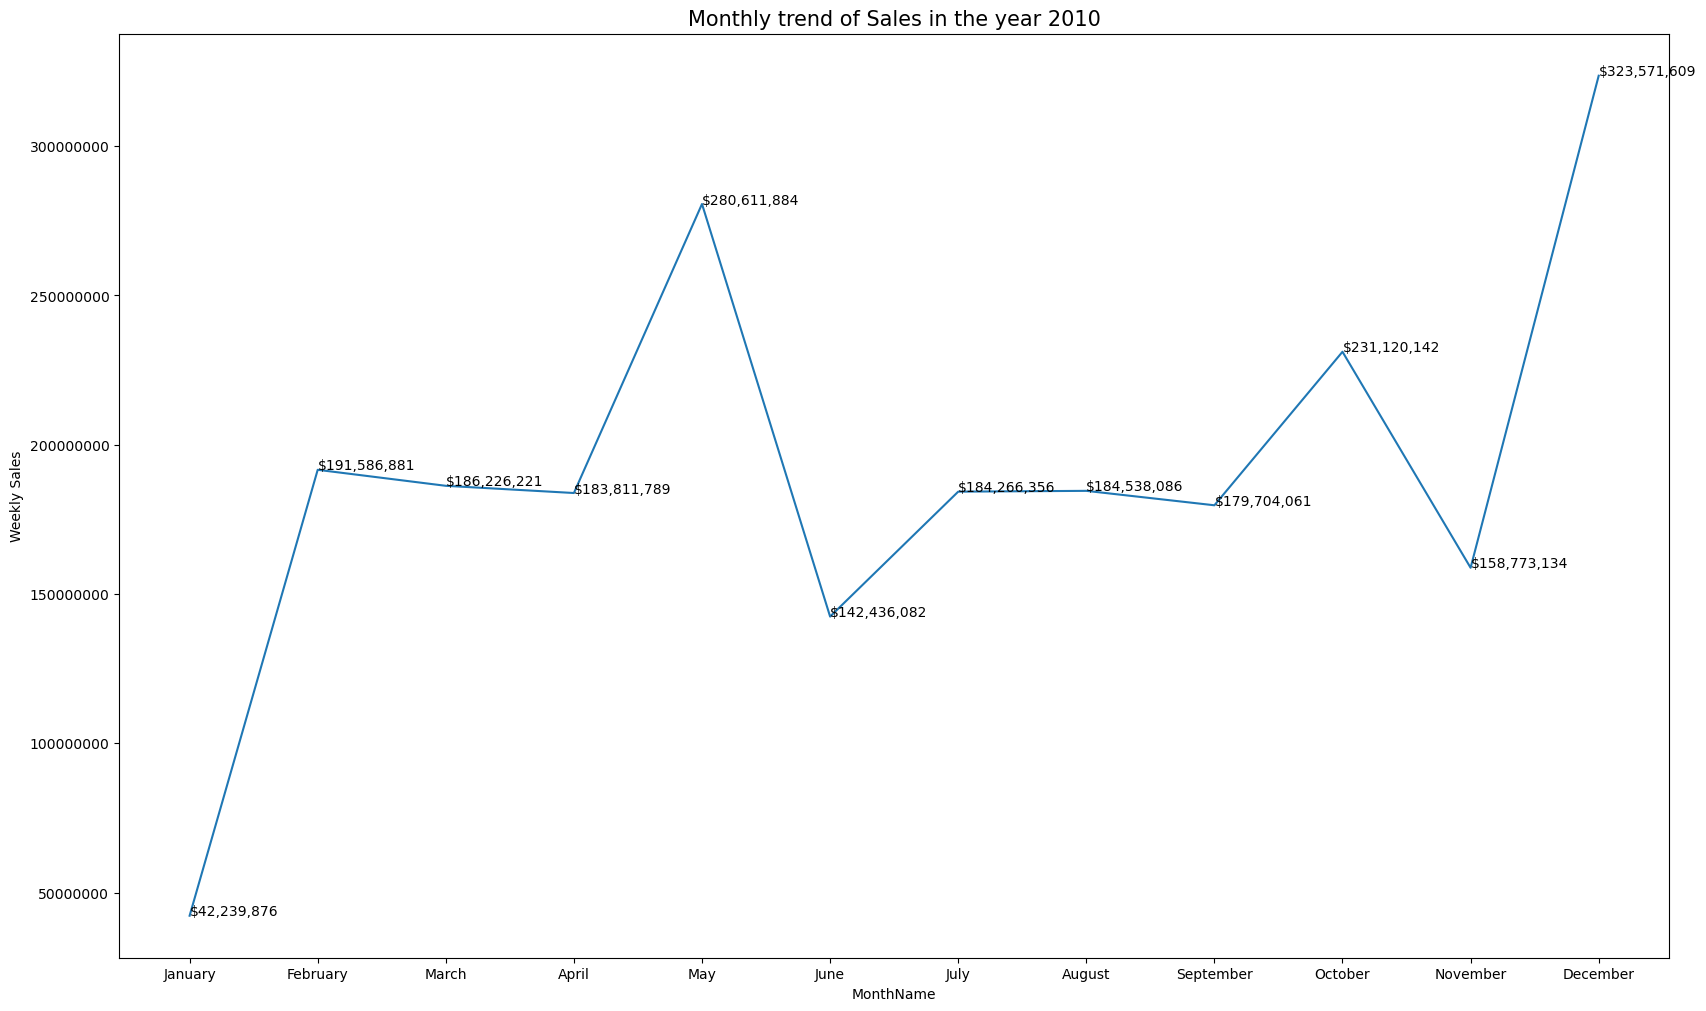

In [103]:
v1 = data_2010.groupby(['MonthName','Month'])['Weekly_Sales'].sum().reset_index().sort_values(by='Month')
plt.subplots(figsize = (20,12))
ax = sns.lineplot(v1,x = 'MonthName',y = 'Weekly_Sales')
for x,y in zip(v1['MonthName'],v1['Weekly_Sales']):
    plt.text(x = x, y = y, s = '${:,.0f}'.format(y))
plt.ticklabel_format(useOffset=False,style='plain',axis='y')
plt.title("Monthly trend of Sales in the year 2010",fontsize = 15)
plt.ylabel("Weekly Sales")
plt.show()

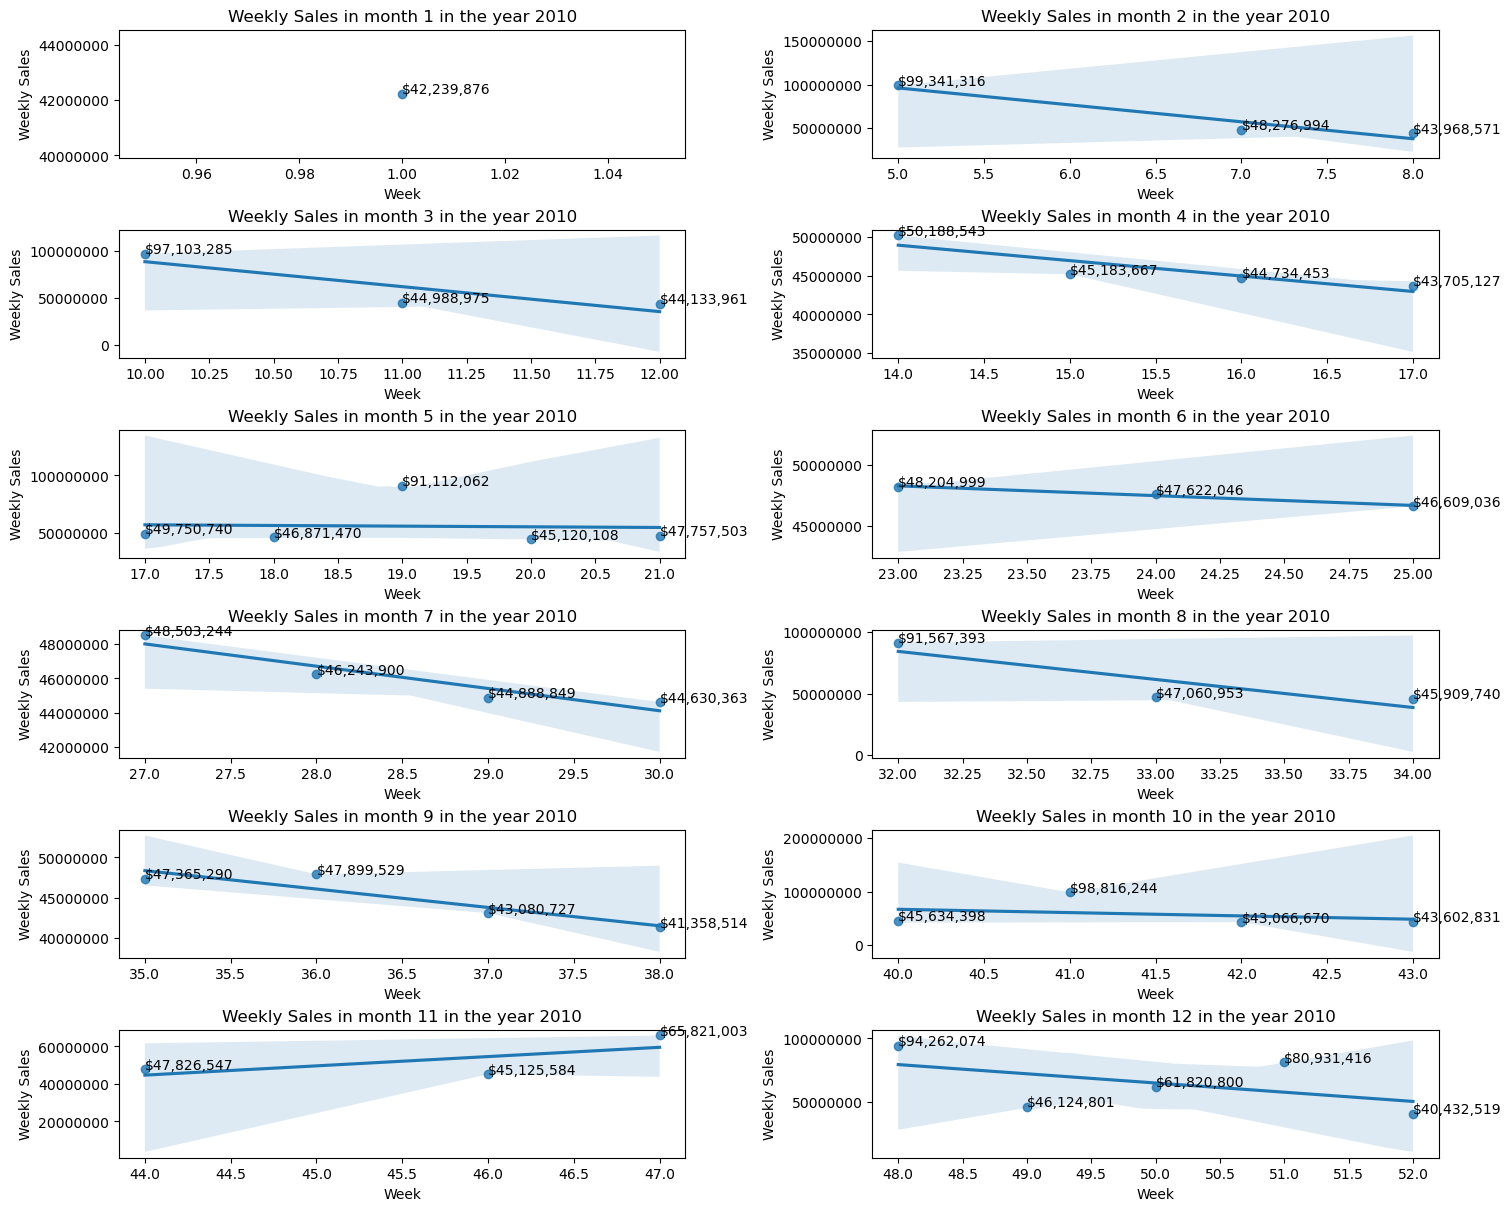

In [104]:

plt.subplots(6,2,figsize=(15,12),constrained_layout = 'True')
for i in range(1,13):
    vm = data_2010[data_2010['Month']==i]
    vw = vm.groupby('Week')['Weekly_Sales'].sum().reset_index()
    
    plt.subplot(6,2,i)
    ax = sns.regplot(vw,x='Week',y = 'Weekly_Sales')
    for x,y in zip(vw['Week'],vw['Weekly_Sales']):
        plt.text(x = x, y = y, s = '${:,.0f}'.format(y))
    plt.ticklabel_format(useOffset=False,style='plain',axis='y')
    plt.title(f'Weekly Sales in month {i} in the year 2010')
    plt.ylabel('Weekly Sales')
plt.show()

In [105]:
data_2011 = data[data['Year']==2011].sort_values(by='Month')
data_2011.head()

Store       Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
3219     23 2011-01-07    1492507.44             0        65.65       3.815   
2062     15 2011-01-04     542556.05             0        30.34       3.811   
4636     33 2011-01-04     232769.09             0        71.41       3.772   
5936     42 2011-01-07     506343.83             0        95.36       3.842   
2053     15 2011-01-28     481119.60             0        19.61       3.402   

             CPI  Unemployment  Year  Month MonthName  Week  
3219  135.446800         4.584  2011      1   January     1  
2062  134.068258         7.658  2011      1   January     1  
4636  128.719935         8.687  2011      1   January     1  
5936  129.089400         8.257  2011      1   January     1  
2053  133.105968         7.771  2011      1   January     4

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should

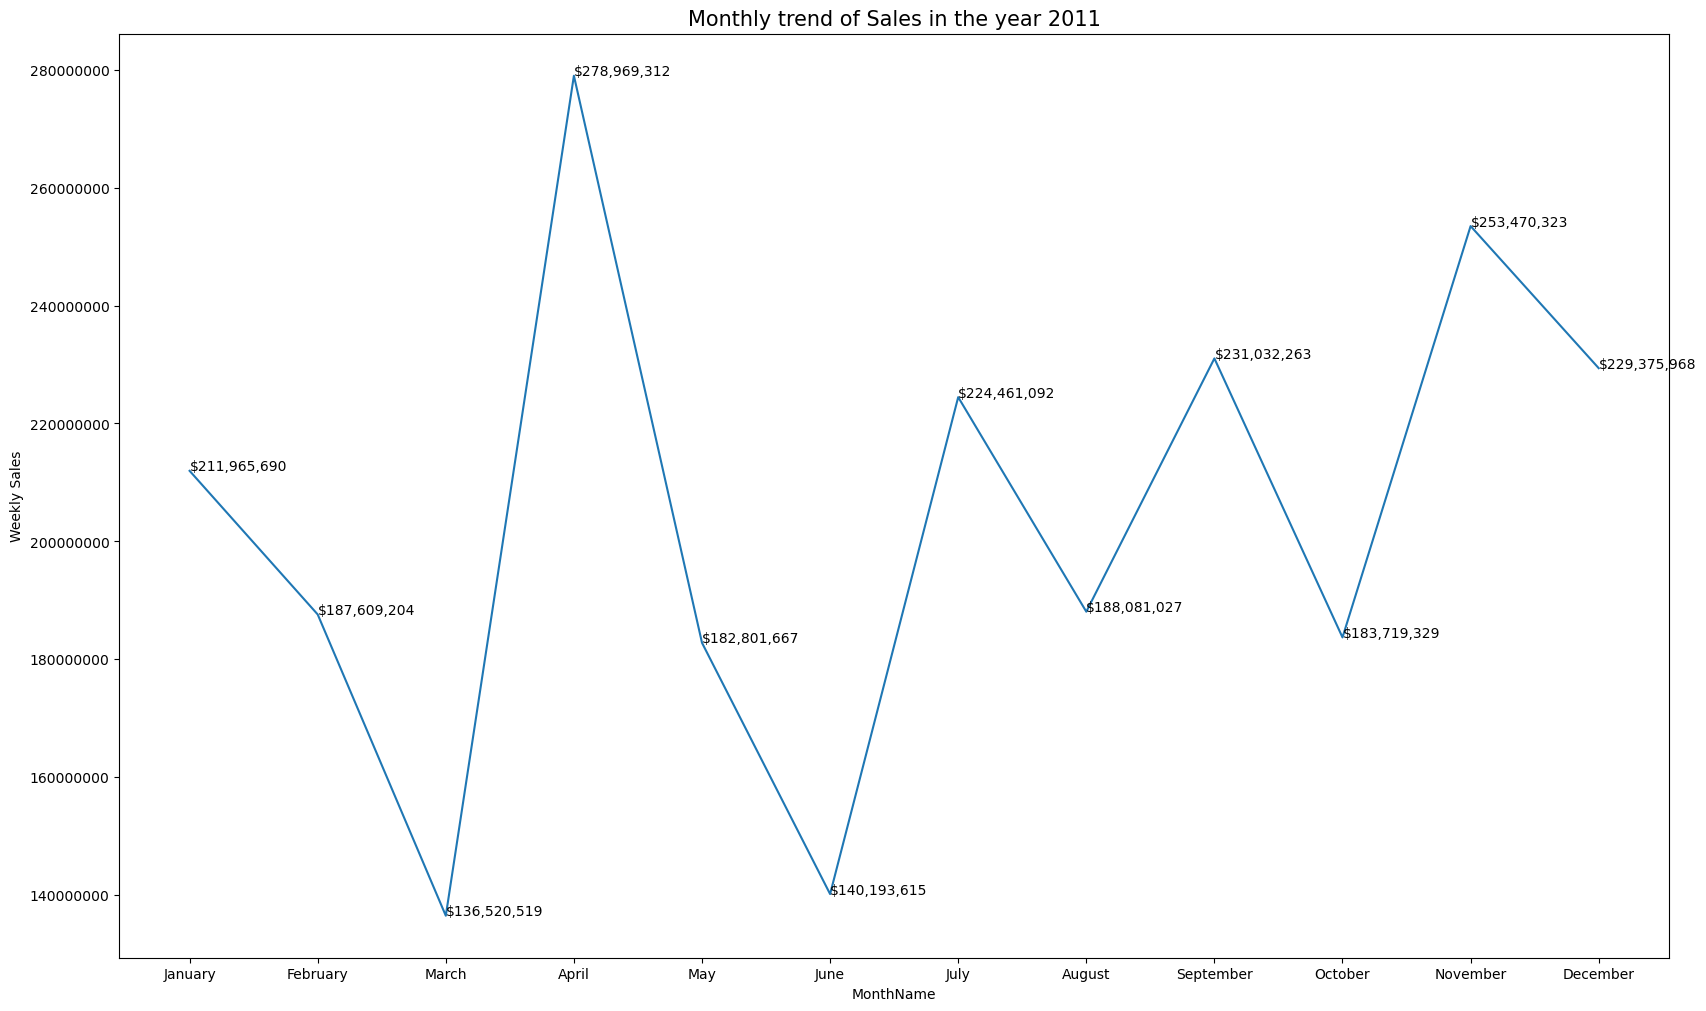

In [106]:
v2 = data_2011.groupby(['MonthName','Month'])['Weekly_Sales'].sum().reset_index().sort_values(by='Month')
plt.subplots(figsize = (20,12))
ax = sns.lineplot(v2,x = 'MonthName',y = 'Weekly_Sales')
for x,y in zip(v2['MonthName'],v2['Weekly_Sales']):
    plt.text(x = x, y = y, s = '${:,.0f}'.format(y))
plt.ticklabel_format(useOffset=False,style='plain',axis='y')
plt.title("Monthly trend of Sales in the year 2011",fontsize=15)
plt.ylabel("Weekly Sales")
plt.show()

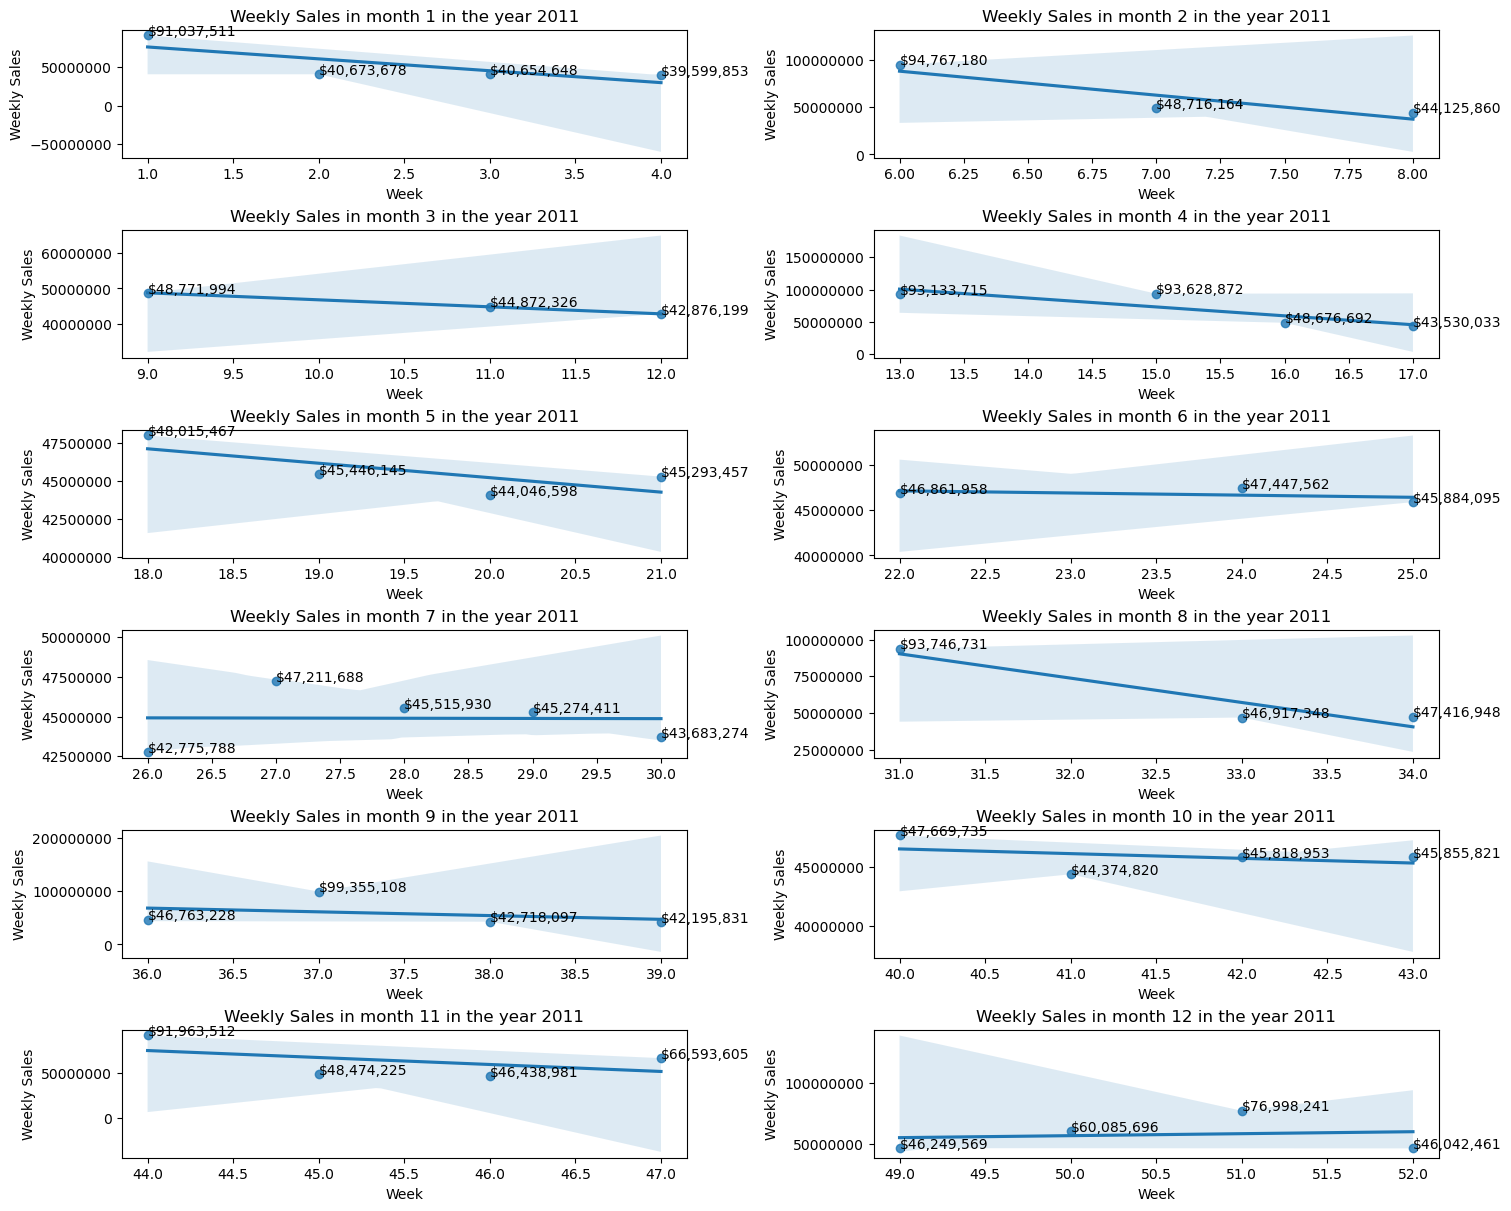

In [107]:

plt.subplots(6,2,figsize=(15,12),constrained_layout = 'True')
for i in range(1,13):
    vm = data_2011[data_2011['Month']==i]
    vw = vm.groupby('Week')['Weekly_Sales'].sum().reset_index()
    
    plt.subplot(6,2,i)
    ax = sns.regplot(vw,x='Week',y = 'Weekly_Sales')
    for x,y in zip(vw['Week'],vw['Weekly_Sales']):
        plt.text(x = x, y = y, s = '${:,.0f}'.format(y))
    plt.ticklabel_format(useOffset=False,style='plain',axis='y')
    plt.title(f'Weekly Sales in month {i} in the year 2011')
    plt.ylabel("Weekly Sales")
plt.show()    

In [108]:
data_2012 = data[data['Year']==2012].sort_values(by='Month')
data_2012.head()

Store       Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
3267     23 2012-01-06    1476144.34             0        66.22       3.798   
2104     15 2012-01-20     492721.85             0        21.39       3.705   
2103     15 2012-01-13     454183.42             0        36.26       3.666   
2695     19 2012-01-06    1450733.29             0        68.18       3.915   
4554     32 2012-01-06    1157557.79             0        62.84       3.764   

             CPI  Unemployment  Year  Month MonthName  Week  
3267  138.113807         4.125  2012      1   January     1  
2104  136.856419         7.943  2012      1   January     3  
2103  136.753000         7.943  2012      1   January     2  
2695  138.113807         8.150  2012      1   January     1  
4554  197.621895         8.090  2012      1   January     1

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should

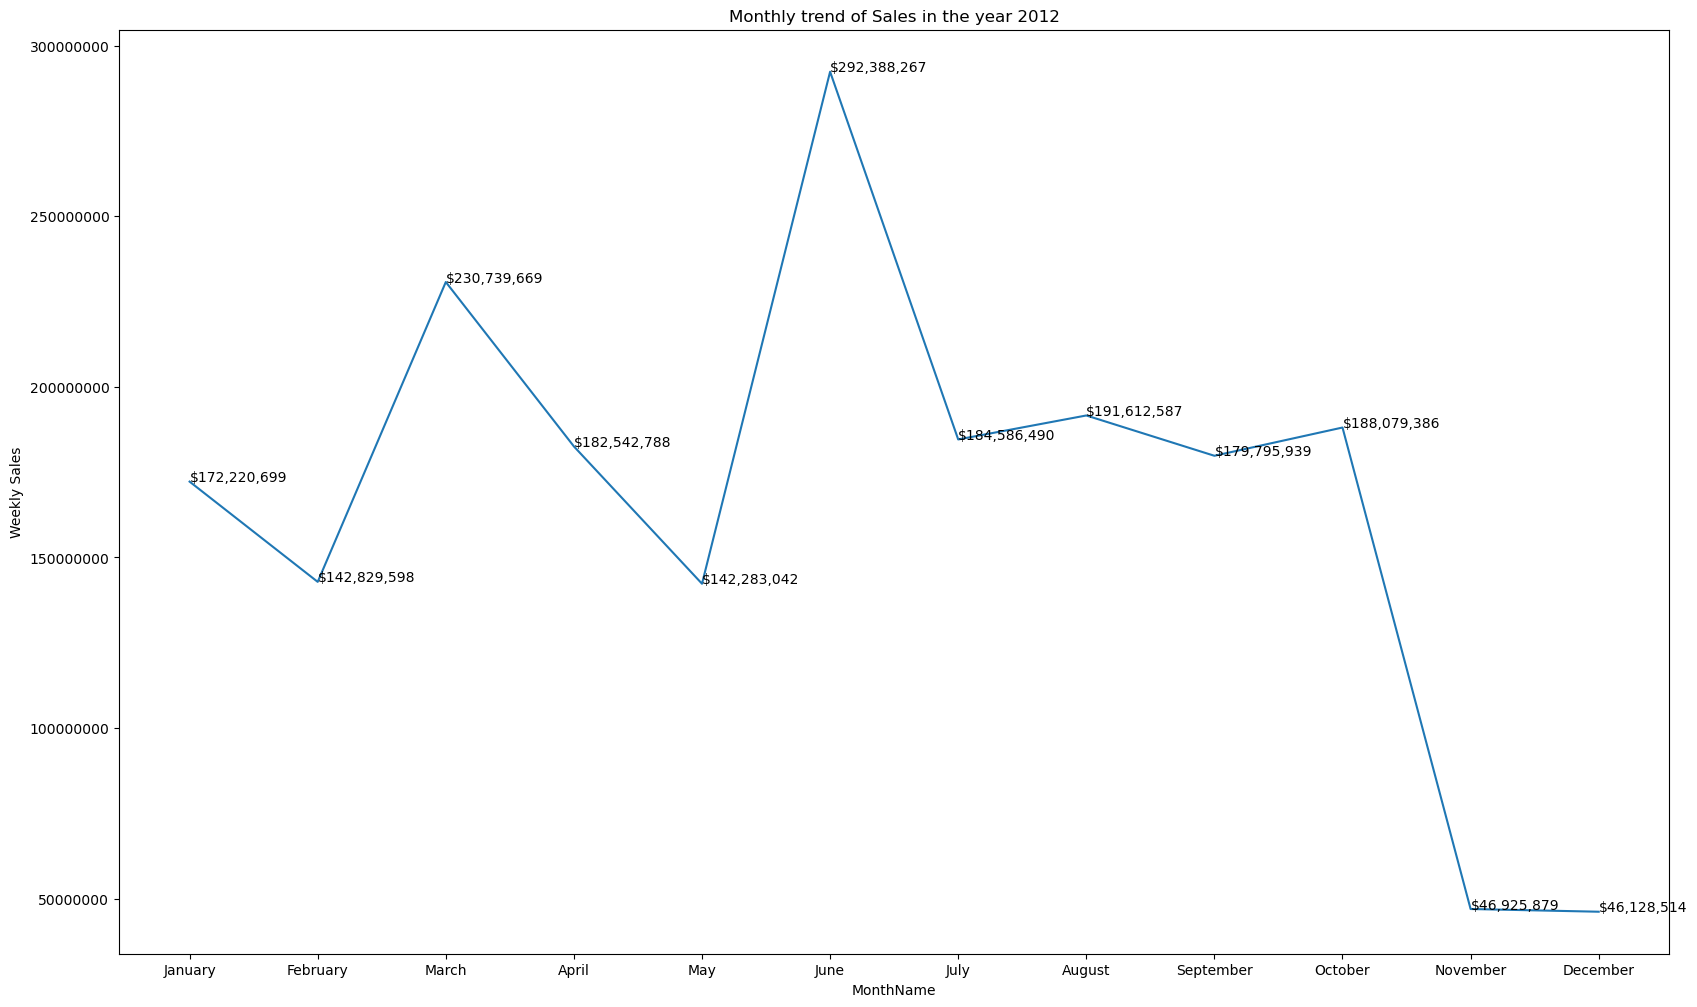

In [109]:
v3 = data_2012.groupby(['MonthName','Month'])['Weekly_Sales'].sum().reset_index().sort_values(by='Month')
plt.subplots(figsize = (20,12))
ax = sns.lineplot(v3,x = 'MonthName',y = 'Weekly_Sales')
for x,y in zip(v3['MonthName'],v3['Weekly_Sales']):
    plt.text(x = x, y = y, s = '${:,.0f}'.format(y))
plt.ticklabel_format(useOffset=False,style='plain',axis='y')
plt.title("Monthly trend of Sales in the year 2012")
plt.ylabel("Weekly Sales")
plt.show()

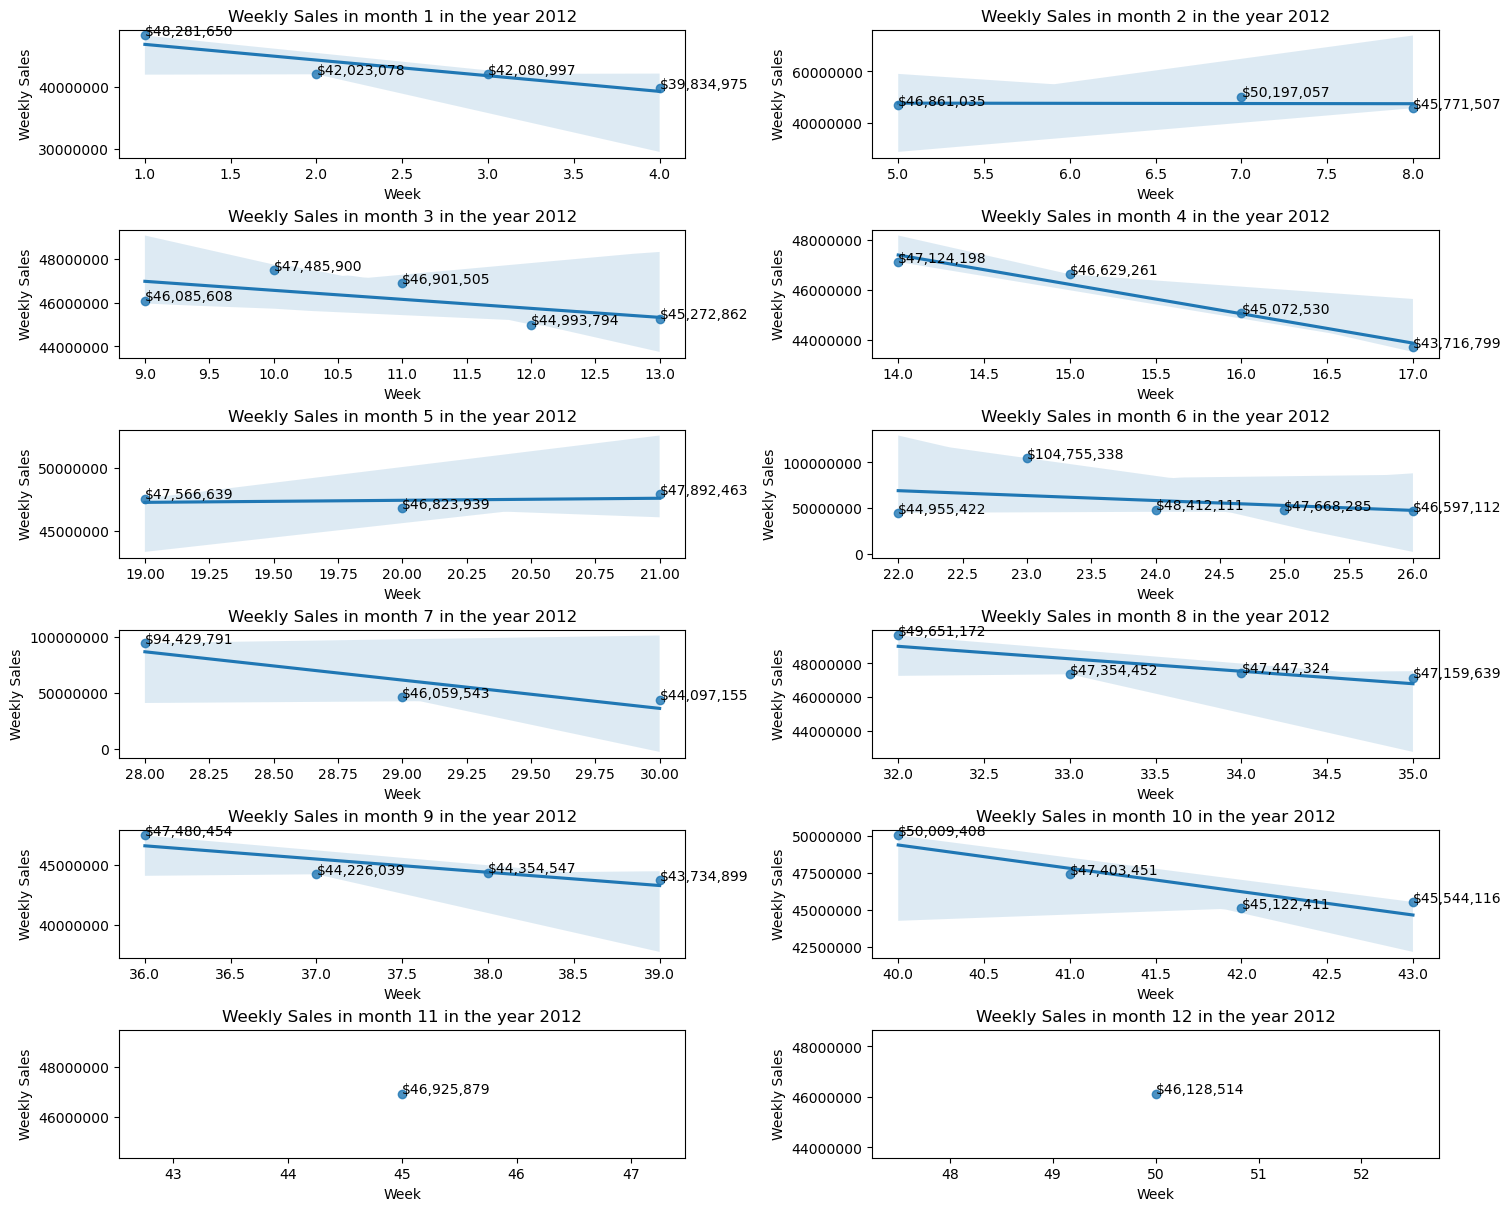

In [110]:

plt.subplots(6,2,figsize=(15,12),constrained_layout = 'True')
for i in range(1,13):
    vm = data_2012[data_2012['Month']==i]
    vw = vm.groupby('Week')['Weekly_Sales'].sum().reset_index()
    
    plt.subplot(6,2,i)
    ax = sns.regplot(vw,x='Week',y = 'Weekly_Sales')
    for x,y in zip(vw['Week'],vw['Weekly_Sales']):
        plt.text(x = x, y = y, s = '${:,.0f}'.format(y))
    plt.ticklabel_format(useOffset=False,style='plain',axis='y')
    plt.title(f'Weekly Sales in month {i} in the year 2012')
    plt.ylabel("Weekly Sales")
plt.show()    

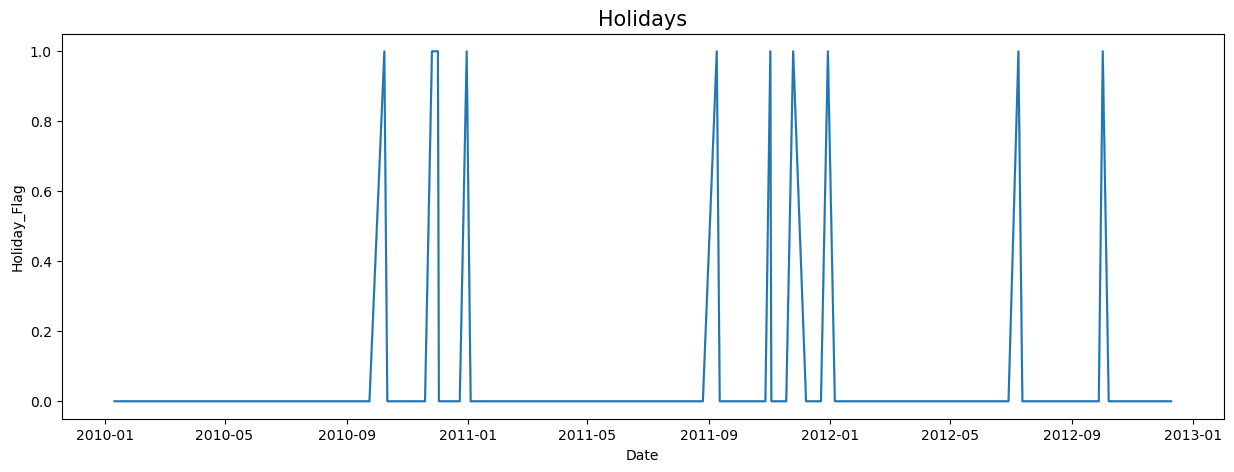

In [111]:
plt.subplots(figsize = (15,5))
sns.lineplot(data,x = 'Date', y = 'Holiday_Flag')
plt.title("Holidays",fontsize=15)
plt.show()

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should

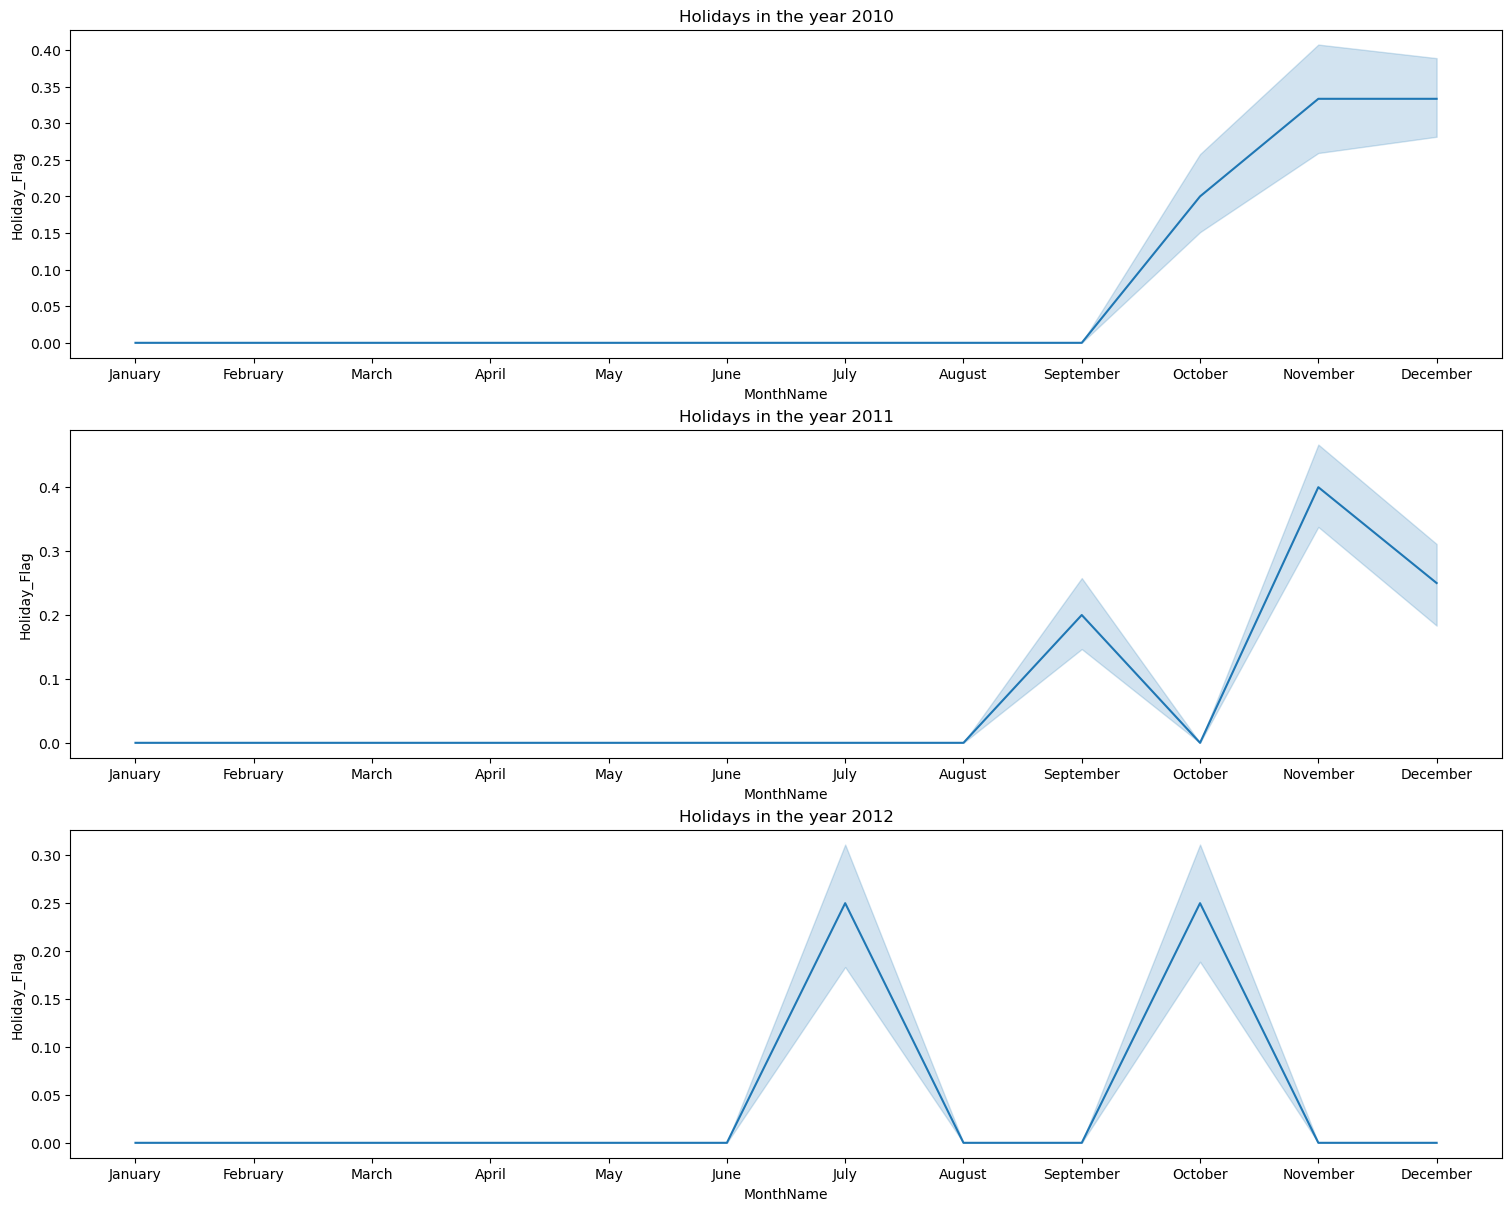

In [112]:
plt.subplots(3,1,figsize = (15,12),constrained_layout = True)
plt.subplot(3,1,1)
sns.lineplot(data_2010,x='MonthName',y = 'Holiday_Flag')
plt.title('Holidays in the year 2010')
plt.subplot(3,1,2)
sns.lineplot(data_2011,x='MonthName',y = 'Holiday_Flag')
plt.title('Holidays in the year 2011')
plt.subplot(3,1,3)
sns.lineplot(data_2012,x='MonthName',y = 'Holiday_Flag')
plt.title('Holidays in the year 2012')
plt.show()

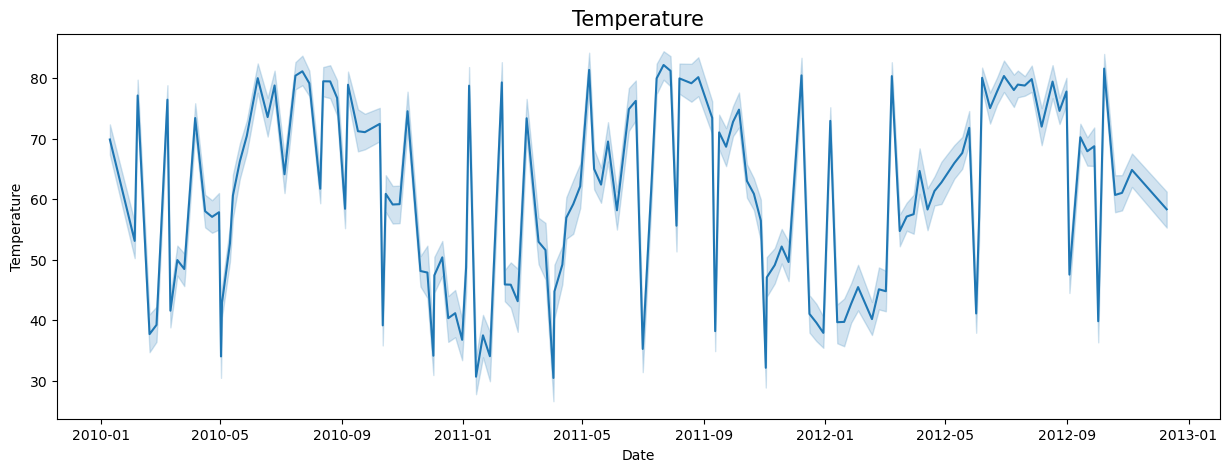

In [113]:
plt.subplots(figsize = (15,5))
sns.lineplot(data,x = 'Date', y = 'Temperature')
plt.title("Temperature",fontsize=15)
plt.show()

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should

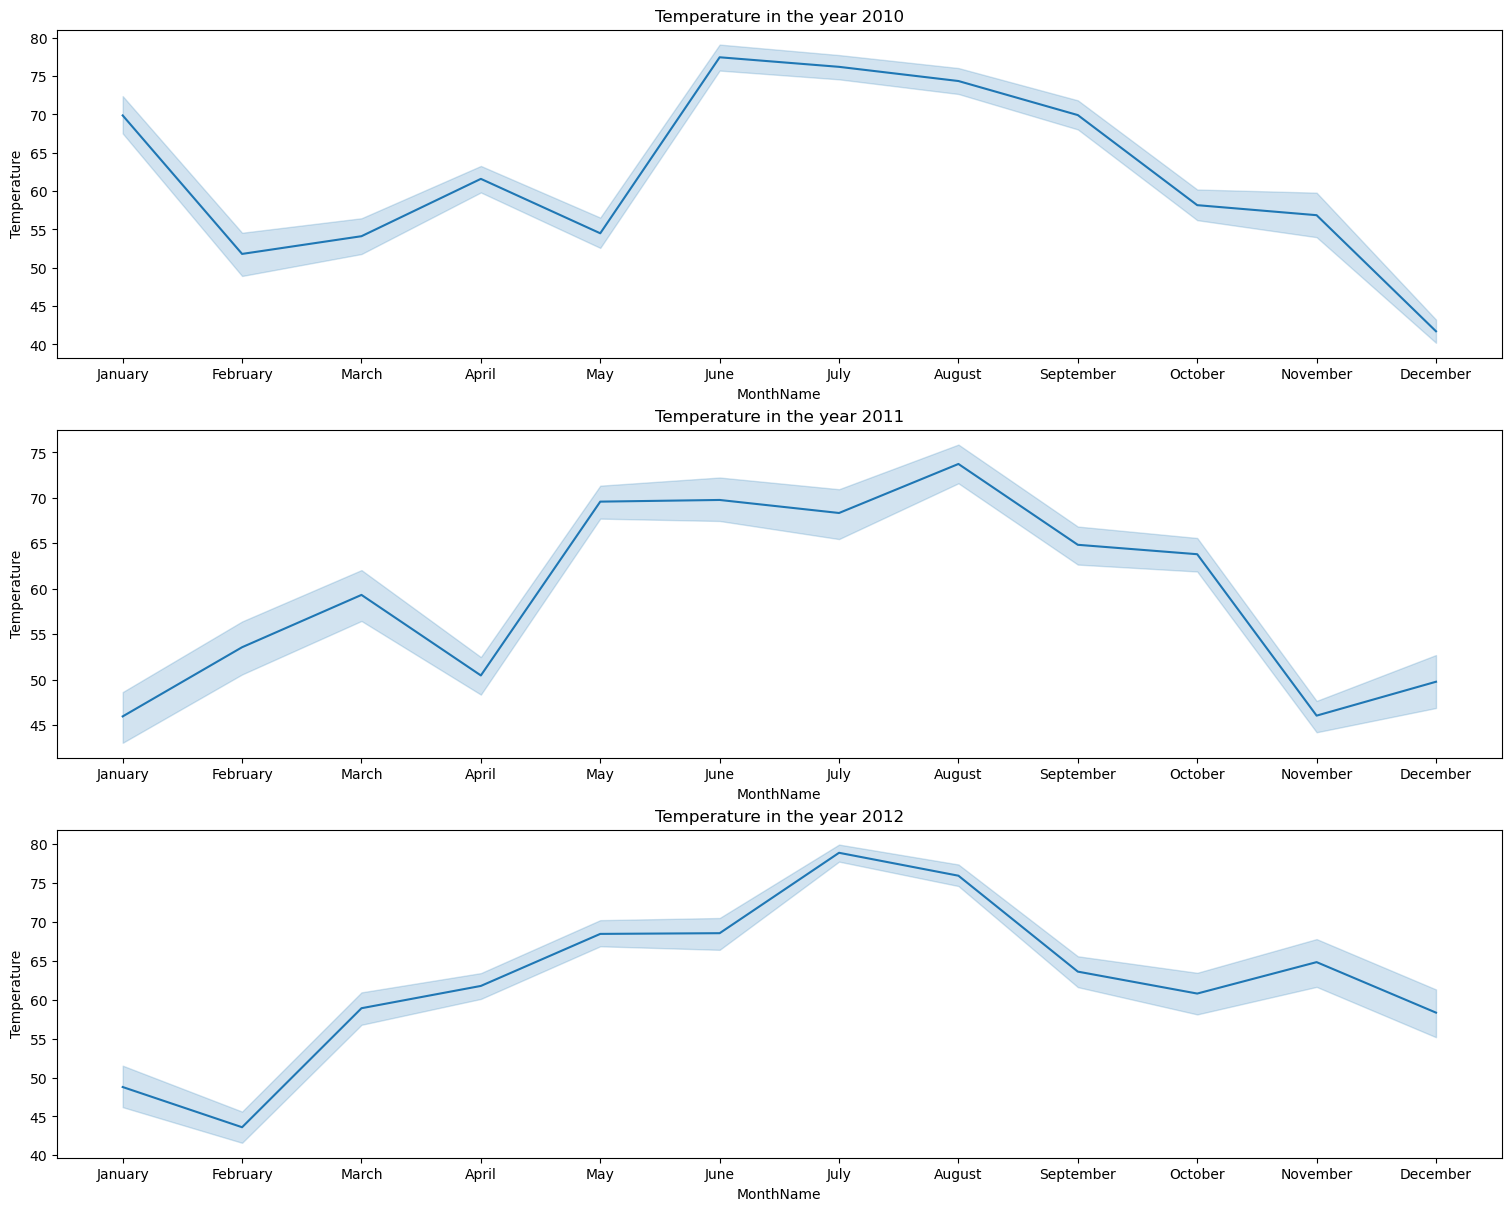

In [114]:
plt.subplots(3,1,figsize = (15,12),constrained_layout = True)
plt.subplot(3,1,1)
sns.lineplot(data_2010,x='MonthName',y = 'Temperature')
plt.title('Temperature in the year 2010')
plt.subplot(3,1,2)
sns.lineplot(data_2011,x='MonthName',y = 'Temperature')
plt.title('Temperature in the year 2011')
plt.subplot(3,1,3)
sns.lineplot(data_2012,x='MonthName',y = 'Temperature')
plt.title('Temperature in the year 2012')
plt.show()

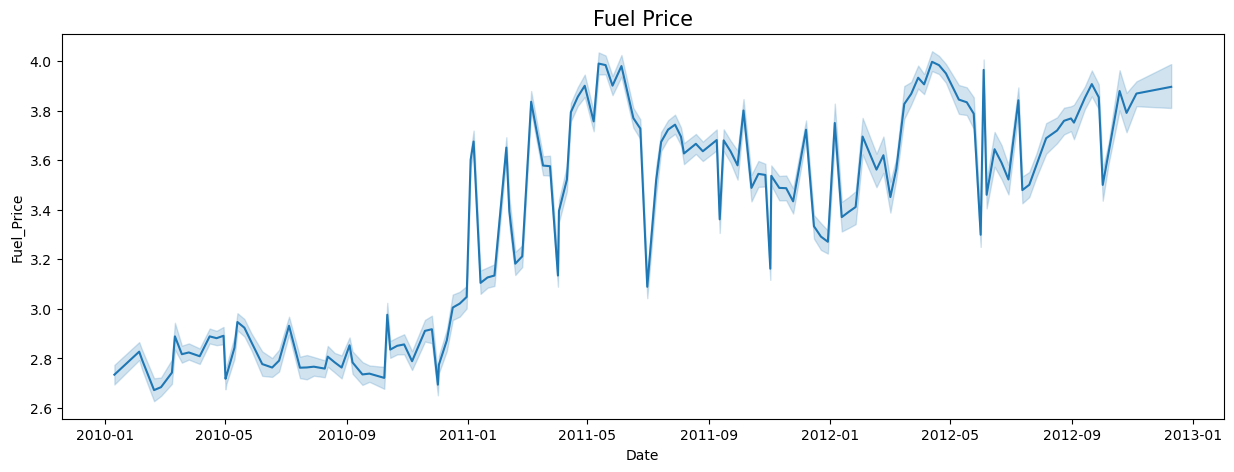

In [115]:
plt.subplots(figsize = (15,5))
sns.lineplot(data,x = 'Date', y = 'Fuel_Price')
plt.title("Fuel Price",fontsize=15)
plt.show()

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should

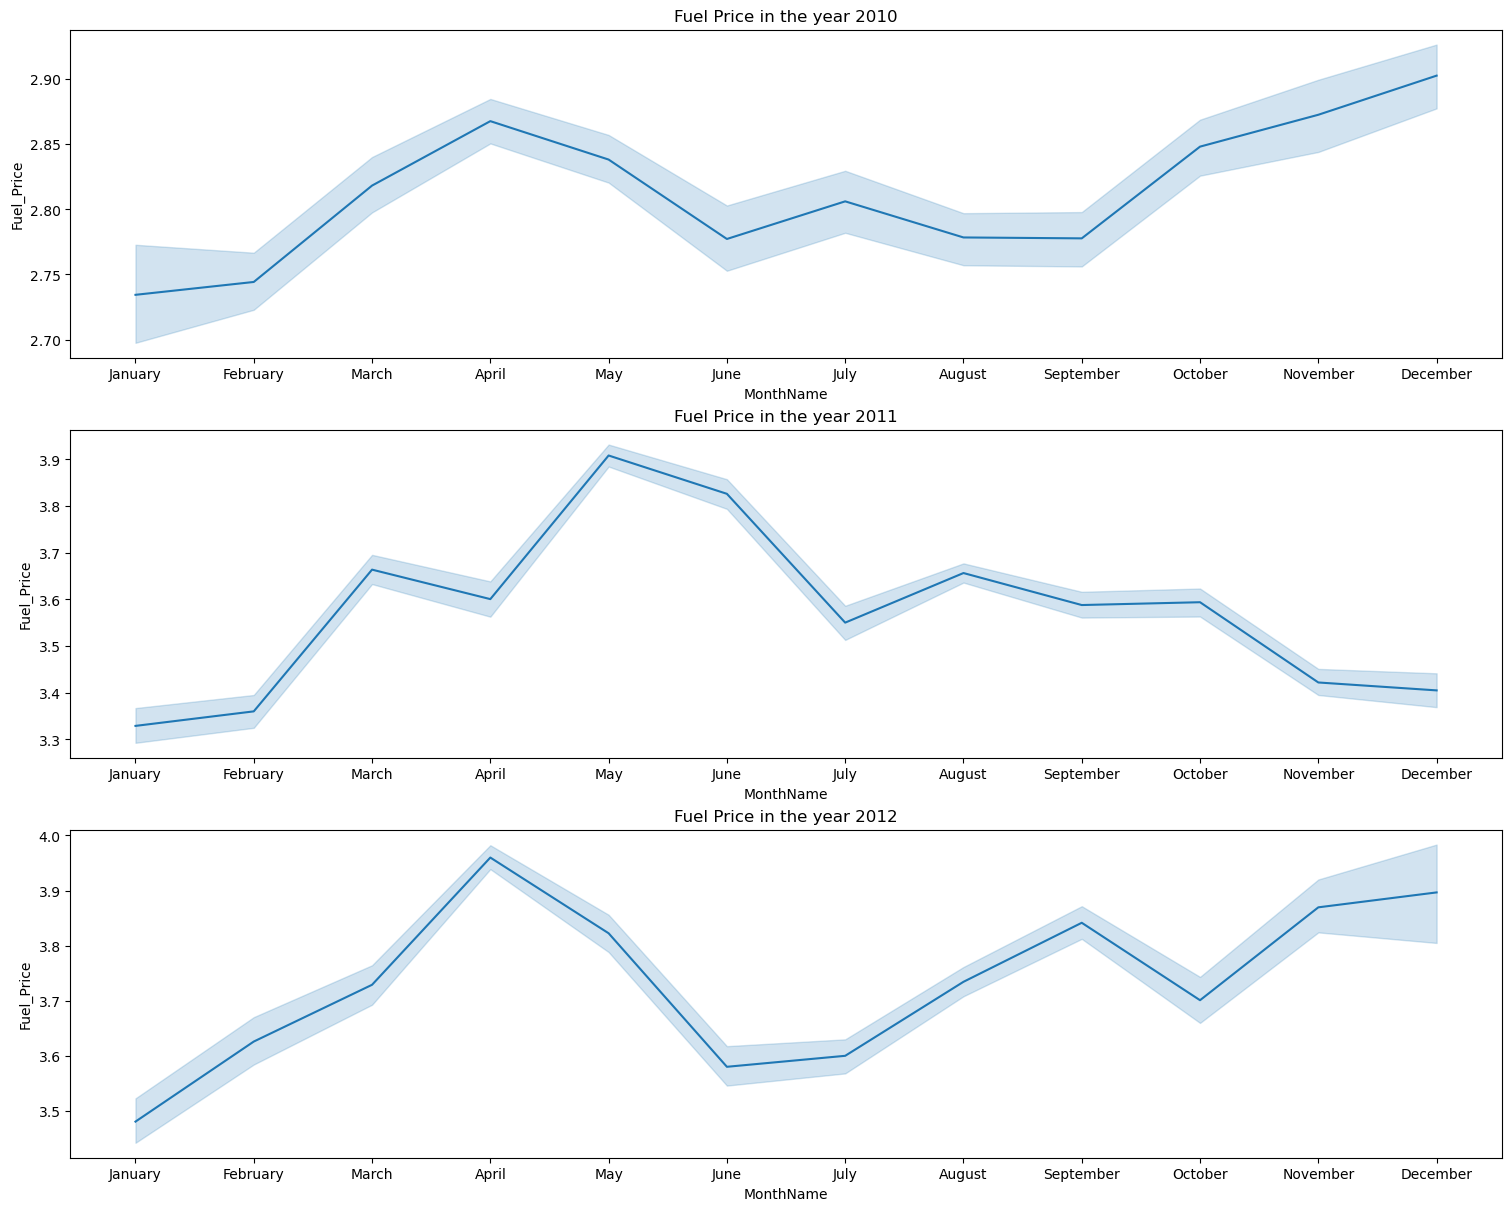

In [116]:
plt.subplots(3,1,figsize = (15,12),constrained_layout = True)
plt.subplot(3,1,1)
sns.lineplot(data_2010,x='MonthName',y = 'Fuel_Price')
plt.title('Fuel Price in the year 2010')
plt.subplot(3,1,2)
sns.lineplot(data_2011,x='MonthName',y = 'Fuel_Price')
plt.title('Fuel Price in the year 2011')
plt.subplot(3,1,3)
sns.lineplot(data_2012,x='MonthName',y = 'Fuel_Price')
plt.title('Fuel Price in the year 2012')
plt.show()

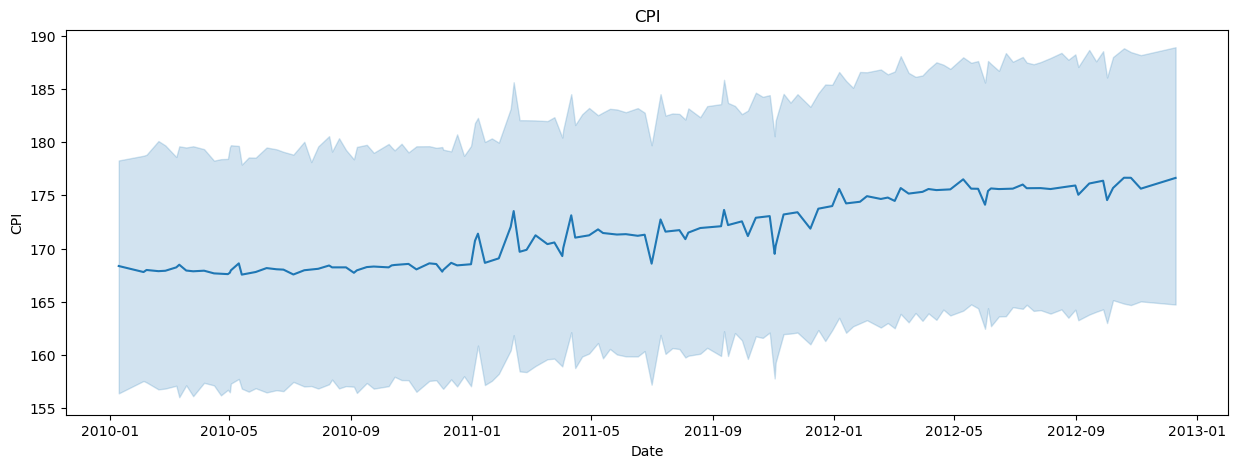

In [117]:
plt.subplots(figsize = (15,5))
sns.lineplot(data,x = 'Date', y = 'CPI')
plt.title("CPI")
plt.show()

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should

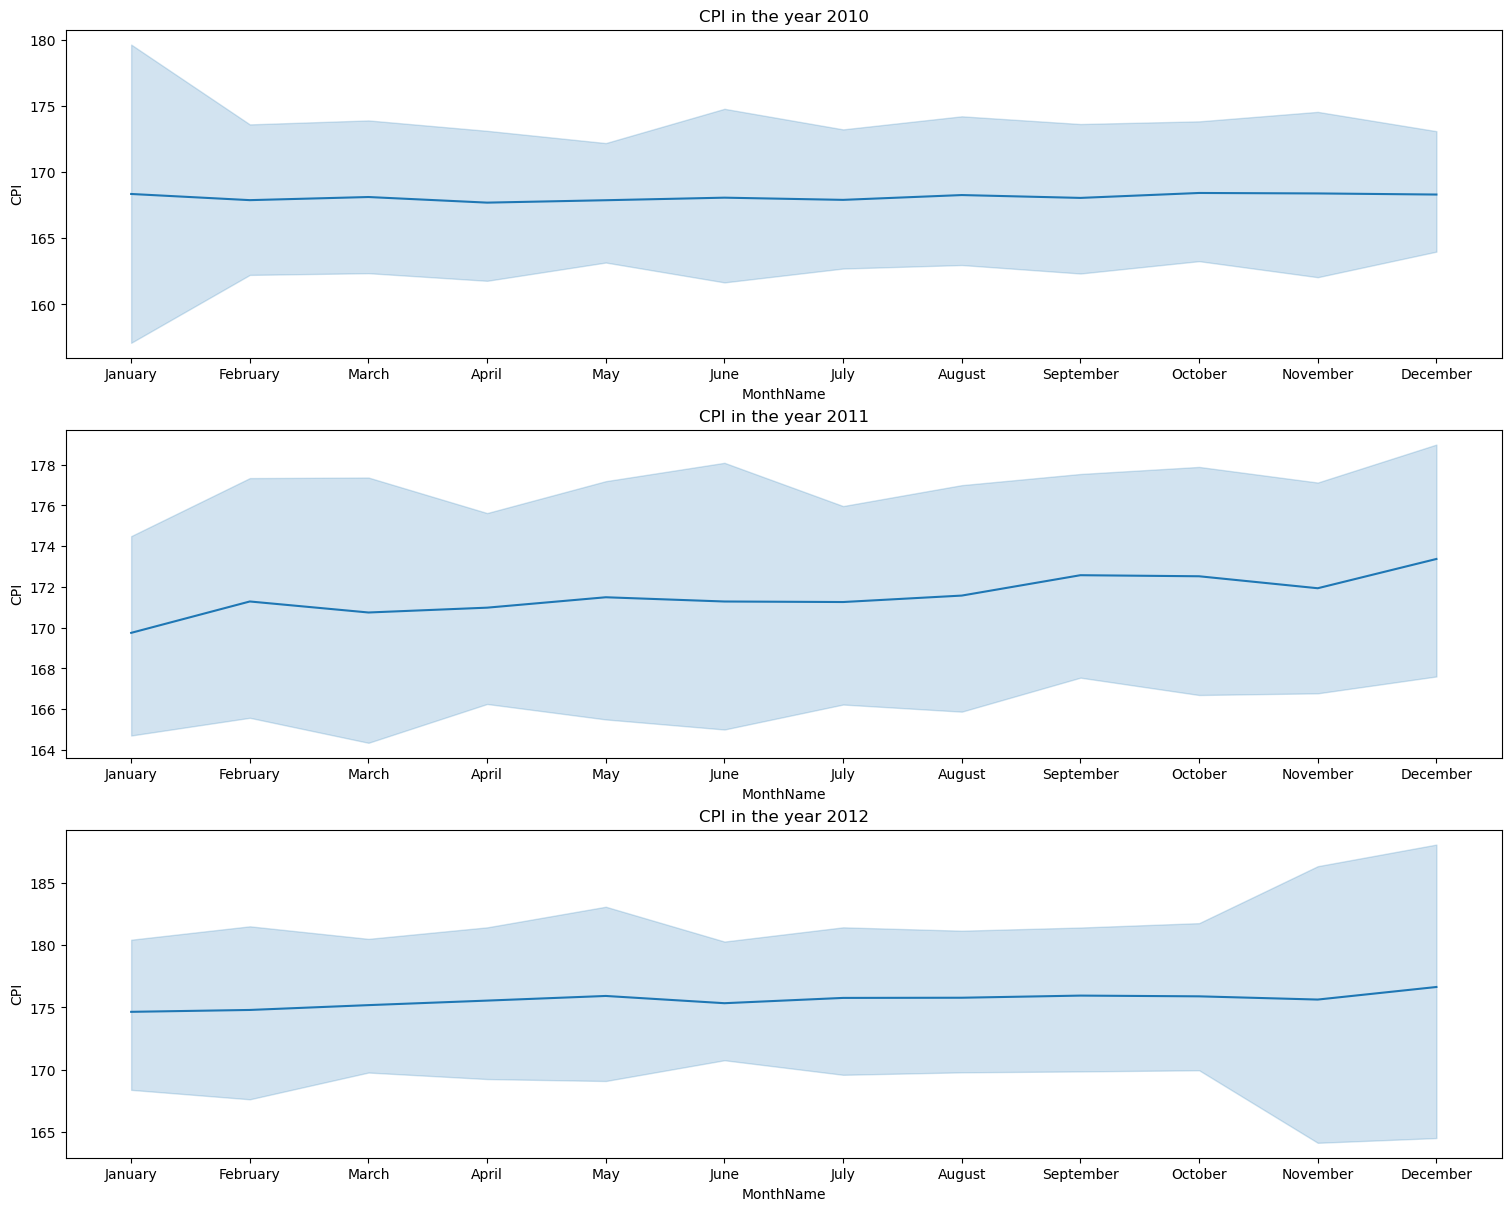

In [118]:
plt.subplots(3,1,figsize = (15,12),constrained_layout = True)
plt.subplot(3,1,1)
sns.lineplot(data_2010,x='MonthName',y = 'CPI')
plt.title('CPI in the year 2010')
plt.subplot(3,1,2)
sns.lineplot(data_2011,x='MonthName',y = 'CPI')
plt.title('CPI in the year 2011')
plt.subplot(3,1,3)
sns.lineplot(data_2012,x='MonthName',y = 'CPI')
plt.title('CPI in the year 2012')
plt.show()

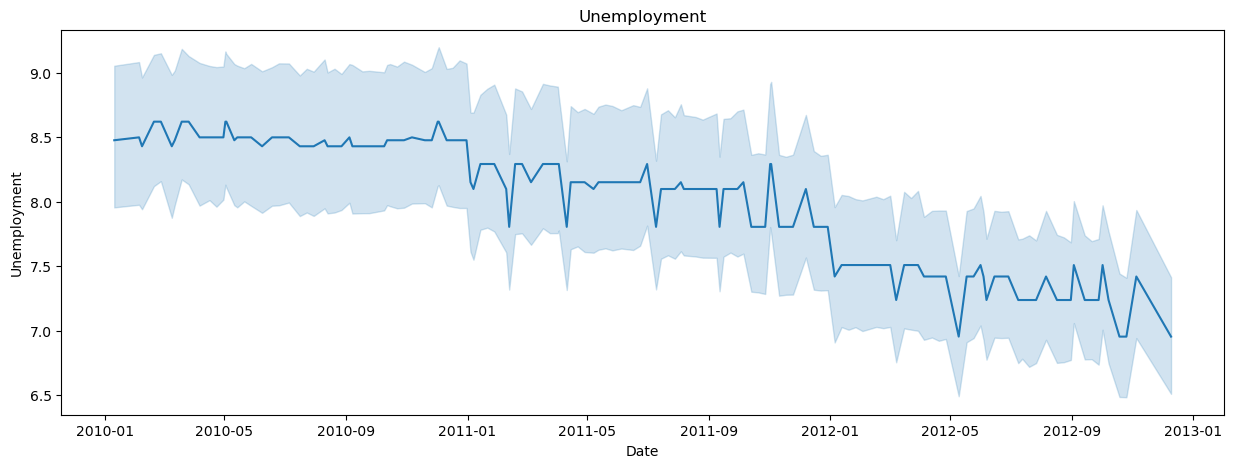

In [119]:
plt.subplots(figsize = (15,5))
sns.lineplot(data,x = 'Date', y = 'Unemployment')
plt.title("Unemployment")
plt.show()

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should

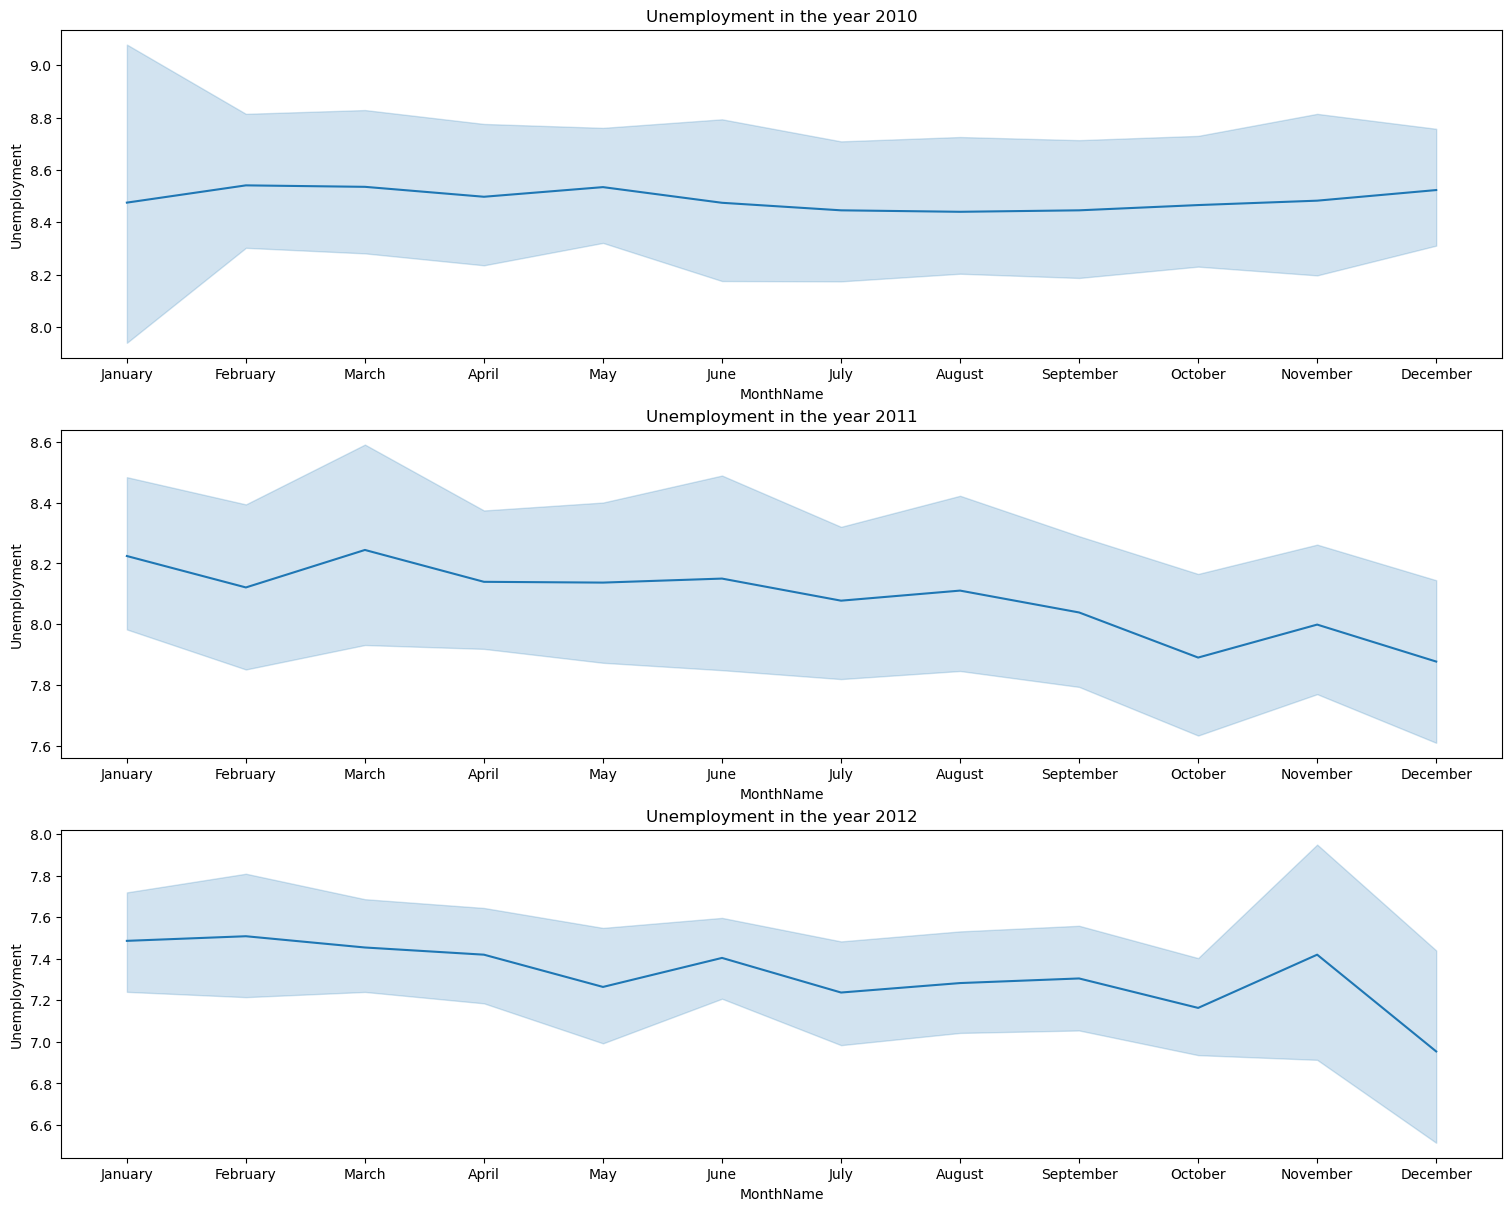

In [120]:
plt.subplots(3,1,figsize = (15,12),constrained_layout = True)
plt.subplot(3,1,1)
sns.lineplot(data_2010,x='MonthName',y = 'Unemployment')
plt.title('Unemployment in the year 2010')
plt.subplot(3,1,2)
sns.lineplot(data_2011,x='MonthName',y = 'Unemployment')
plt.title('Unemployment in the year 2011')
plt.subplot(3,1,3)
sns.lineplot(data_2012,x='MonthName',y = 'Unemployment')
plt.title('Unemployment in the year 2012')
plt.show()

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should

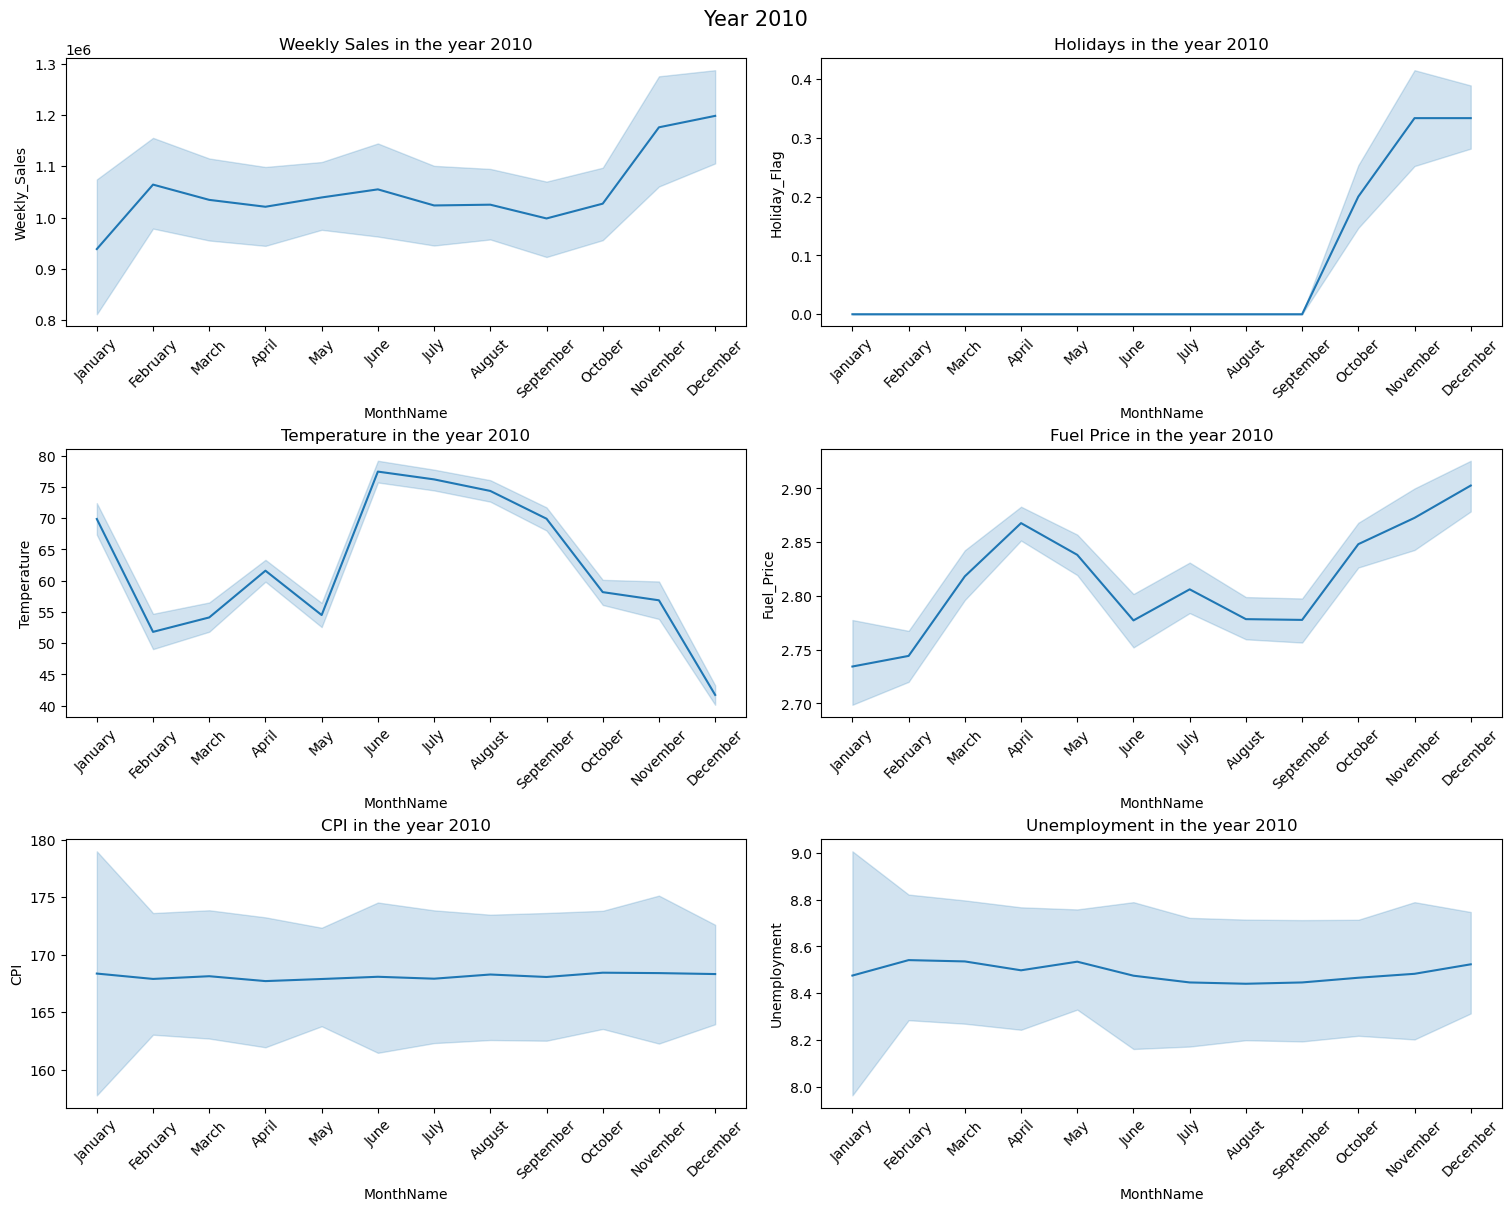

In [121]:
plt.subplots(3,2,figsize = (15,12),constrained_layout = True)
plt.suptitle("Year 2010", fontsize=15)
plt.subplot(3,2,1)
sns.lineplot(data_2010,x='MonthName',y = 'Weekly_Sales')
plt.xticks(rotation = 45)
plt.title('Weekly Sales in the year 2010')
plt.subplot(3,2,2)
sns.lineplot(data_2010,x='MonthName',y = 'Holiday_Flag')
plt.xticks(rotation = 45)
plt.title('Holidays in the year 2010')
plt.subplot(3,2,3)
sns.lineplot(data_2010,x='MonthName',y = 'Temperature')
plt.xticks(rotation = 45)
plt.title('Temperature in the year 2010')
plt.subplot(3,2,4)
sns.lineplot(data_2010,x='MonthName',y = 'Fuel_Price')
plt.xticks(rotation = 45)
plt.title('Fuel Price in the year 2010')
plt.subplot(3,2,5)
sns.lineplot(data_2010,x='MonthName',y = 'CPI')
plt.xticks(rotation = 45)
plt.title('CPI in the year 2010')
plt.subplot(3,2,6)
sns.lineplot(data_2010,x='MonthName',y = 'Unemployment')
plt.xticks(rotation = 45)
plt.title('Unemployment in the year 2010')
plt.show()



INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should

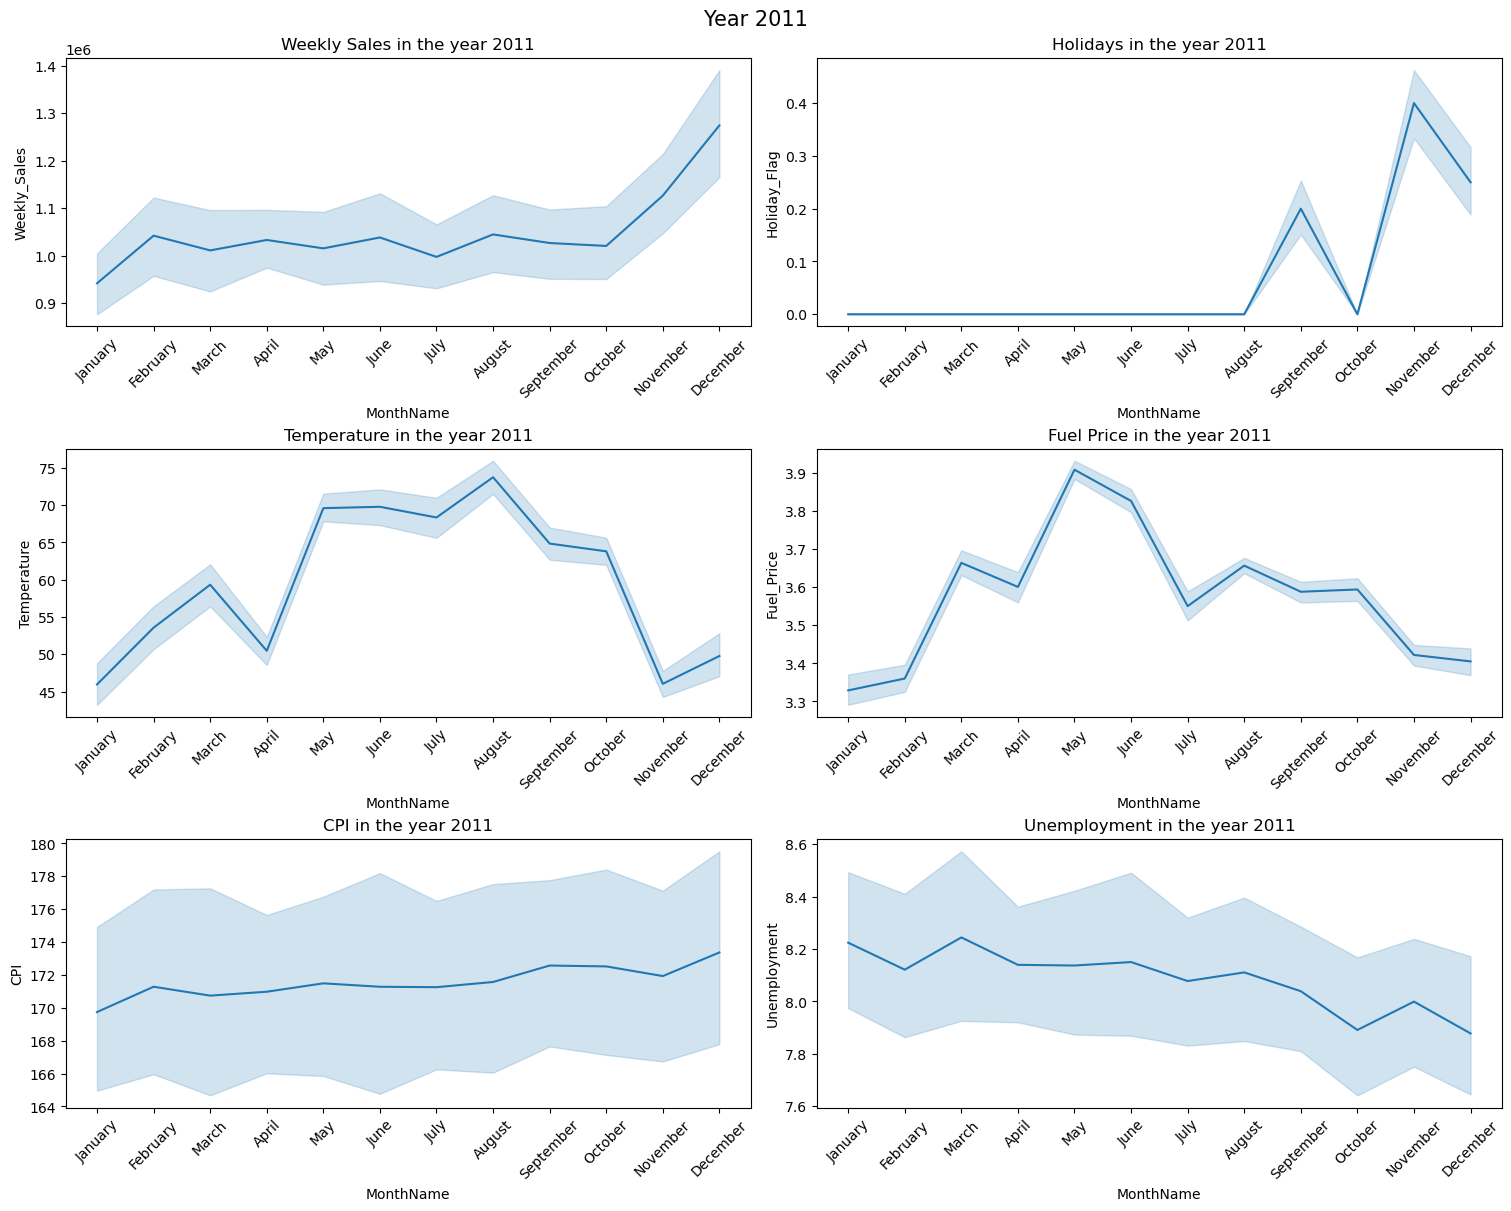

In [122]:
plt.subplots(3,2,figsize = (15,12),constrained_layout = True)
plt.suptitle("Year 2011", fontsize=15)
plt.subplot(3,2,1)
sns.lineplot(data_2011,x='MonthName',y = 'Weekly_Sales')
plt.xticks(rotation = 45)
plt.title('Weekly Sales in the year 2011')
plt.subplot(3,2,2)
sns.lineplot(data_2011,x='MonthName',y = 'Holiday_Flag')
plt.xticks(rotation = 45)
plt.title('Holidays in the year 2011')
plt.subplot(3,2,3)
sns.lineplot(data_2011,x='MonthName',y = 'Temperature')
plt.xticks(rotation = 45)
plt.title('Temperature in the year 2011')
plt.subplot(3,2,4)
sns.lineplot(data_2011,x='MonthName',y = 'Fuel_Price')
plt.xticks(rotation = 45)
plt.title('Fuel Price in the year 2011')
plt.subplot(3,2,5)
sns.lineplot(data_2011,x='MonthName',y = 'CPI')
plt.xticks(rotation = 45)
plt.title('CPI in the year 2011')
plt.subplot(3,2,6)
sns.lineplot(data_2011,x='MonthName',y = 'Unemployment')
plt.xticks(rotation = 45)
plt.title('Unemployment in the year 2011')
plt.show()

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should

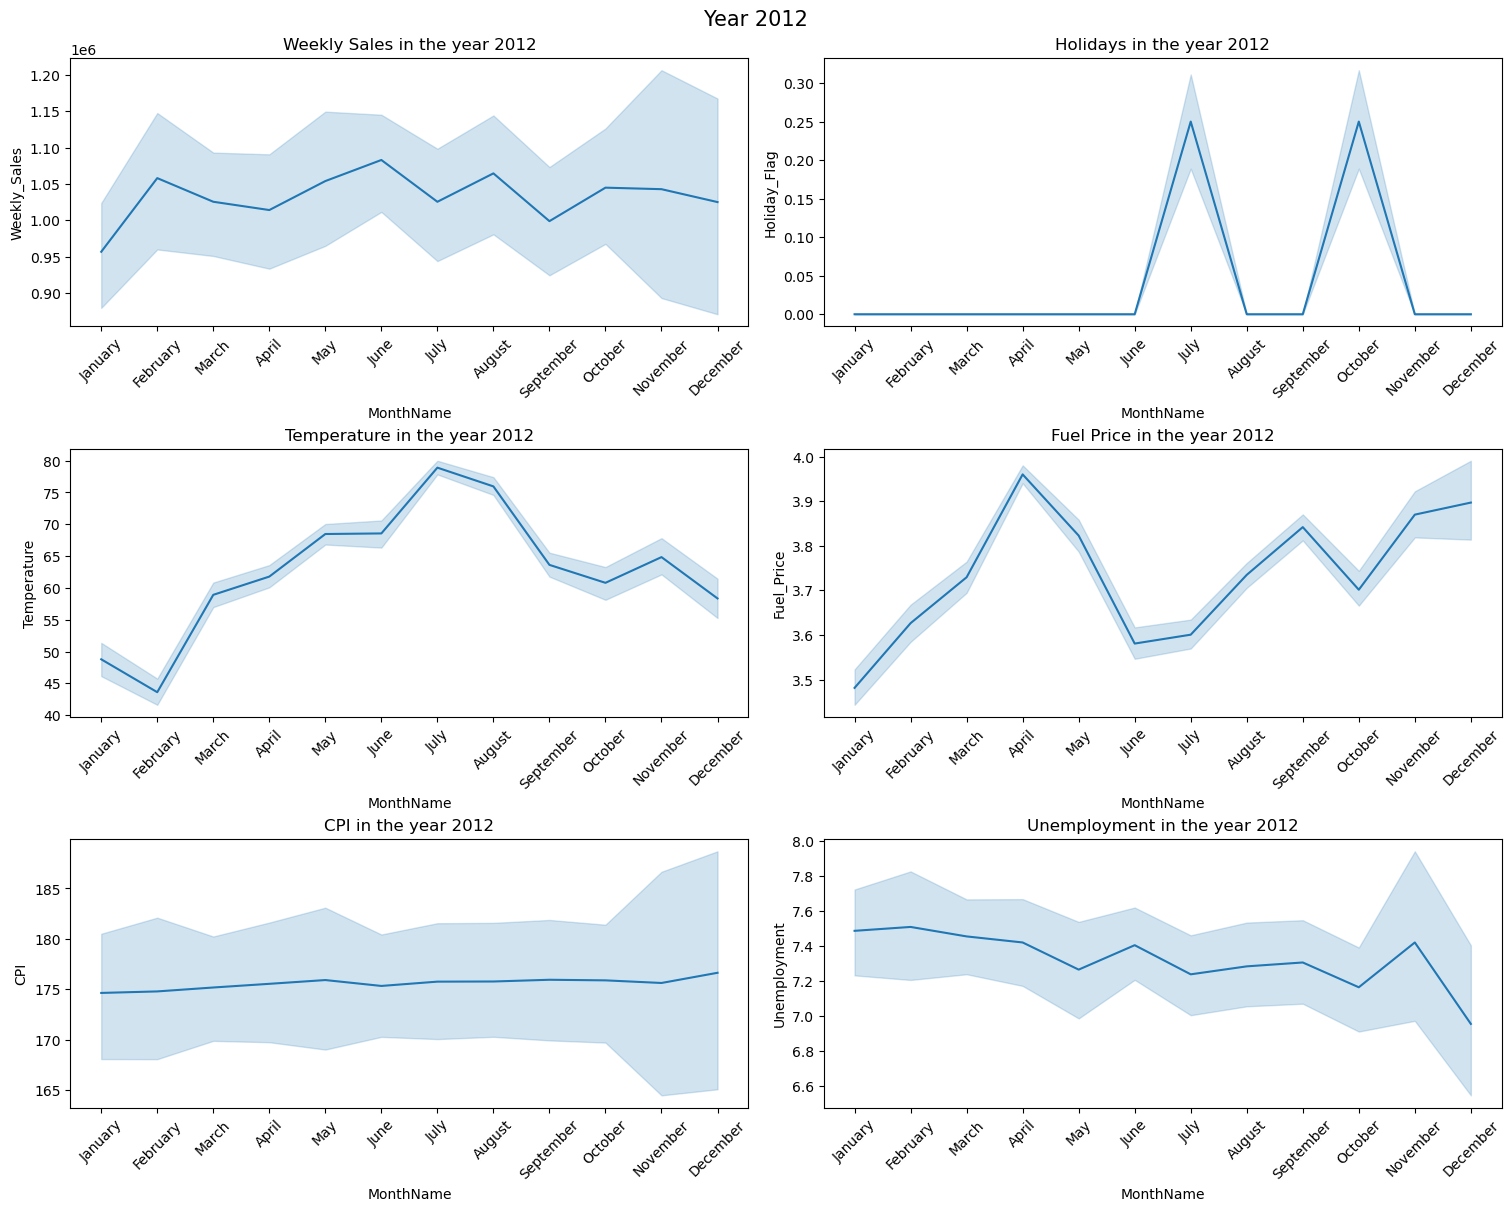

In [123]:
plt.subplots(3,2,figsize = (15,12),constrained_layout = True)
plt.suptitle("Year 2012", fontsize=15)
plt.subplot(3,2,1)
sns.lineplot(data_2012,x='MonthName',y = 'Weekly_Sales')
plt.xticks(rotation = 45)
plt.title('Weekly Sales in the year 2012')
plt.subplot(3,2,2)
sns.lineplot(data_2012,x='MonthName',y = 'Holiday_Flag')
plt.xticks(rotation = 45)
plt.title('Holidays in the year 2012')
plt.subplot(3,2,3)
sns.lineplot(data_2012,x='MonthName',y = 'Temperature')
plt.xticks(rotation = 45)
plt.title('Temperature in the year 2012')
plt.subplot(3,2,4)
sns.lineplot(data_2012,x='MonthName',y = 'Fuel_Price')
plt.xticks(rotation = 45)
plt.title('Fuel Price in the year 2012')
plt.subplot(3,2,5)
sns.lineplot(data_2012,x='MonthName',y = 'CPI')
plt.xticks(rotation = 45)
plt.title('CPI in the year 2012')
plt.subplot(3,2,6)
sns.lineplot(data_2012,x='MonthName',y = 'Unemployment')
plt.xticks(rotation = 45)
plt.title('Unemployment in the year 2012')
plt.show()

In [124]:
reg_data = data.drop(columns=['Date','MonthName'])
reg_data.head()

Store  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price         CPI  \
0      1    1643690.90             0        42.31       2.572  211.096358   
1      1    1641957.44             1        38.51       2.548  211.242170   
2      1    1611968.17             0        39.93       2.514  211.289143   
3      1    1409727.59             0        46.63       2.561  211.319643   
4      1    1554806.68             0        46.50       2.625  211.350143   

   Unemployment  Year  Month  Week  
0         8.106  2010      5    17  
1         8.106  2010     12    48  
2         8.106  2010      2     7  
3         8.106  2010      2     8  
4         8.106  2010      5    18

In [125]:
reg_data.shape

(6435, 10)

In [126]:
X = reg_data.drop(columns='Weekly_Sales')
y = reg_data[['Weekly_Sales']]

In [127]:
from sklearn.preprocessing import MinMaxScaler
scale = MinMaxScaler()
X = pd.DataFrame(scale.fit_transform(X),columns=X.columns)
X.head()

Store  Holiday_Flag  Temperature  Fuel_Price       CPI  Unemployment  Year  \
0    0.0           0.0     0.434149    0.050100  0.840500      0.405118   0.0   
1    0.0           1.0     0.396967    0.038076  0.841941      0.405118   0.0   
2    0.0           0.0     0.410861    0.021042  0.842405      0.405118   0.0   
3    0.0           0.0     0.476419    0.044589  0.842707      0.405118   0.0   
4    0.0           0.0     0.475147    0.076653  0.843008      0.405118   0.0   

      Month      Week  
0  0.363636  0.313725  
1  1.000000  0.921569  
2  0.090909  0.117647  
3  0.090909  0.137255  
4  0.363636  0.333333

In [128]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((5148, 9), (1287, 9), (5148, 1), (1287, 1))

In [129]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

In [130]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

In [131]:
def evaluation_metrics(y_test,y_pred):
    mse = mean_squared_error(y_test,y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test,y_pred)
    r2score = r2_score(y_test,y_pred)
    
    print(f'Mean Squared Error = {mse}')
    print(f'Mean Absolute Error = {mae}')
    print(f'Root Mean Squared Error = {rmse}')
    print(f'r2 score = {r2score}')

In [132]:
linear_model = LinearRegression(normalize=False)
linear_model.fit(x_train,y_train)
linear_pred = linear_model.predict(x_test)

In [133]:
evaluation_metrics(y_test,linear_pred)

Mean Squared Error = 278983361285.04205
Mean Absolute Error = 432132.20803094486
Root Mean Squared Error = 528188.7553564938
r2 score = 0.1341112685334952


In [134]:
Comparison = x_test.copy("deep")
Comparison['Actual Sales'] = y_test
Comparison['Predicted Sales'] = linear_pred
Comparison.head()

Store  Holiday_Flag  Temperature  Fuel_Price       CPI  Unemployment  \
4908  0.772727           0.0     0.326810    0.335170  0.104116      0.468085   
1183  0.181818           0.0     0.594423    0.108717  0.884092      0.256948   
909   0.136364           0.0     0.119080    0.268537  0.648460      0.473356   
3126  0.477273           0.0     0.671429    0.606713  0.158797      0.363427   
5840  0.909091           0.0     0.557241    0.667335  0.706983      0.255703   

      Year     Month      Week  Actual Sales  Predicted Sales  
4908   0.0  1.000000  0.980392    1779236.54     1.022551e+06  
1183   0.0  0.363636  0.352941     517869.97     1.179810e+06  
909    0.5  0.000000  0.058824     513372.17     1.198696e+06  
3126   1.0  0.454545  0.450980    1061219.19     1.094858e+06  
5840   1.0  0.363636  0.392157    1424500.47     7.117781e+05

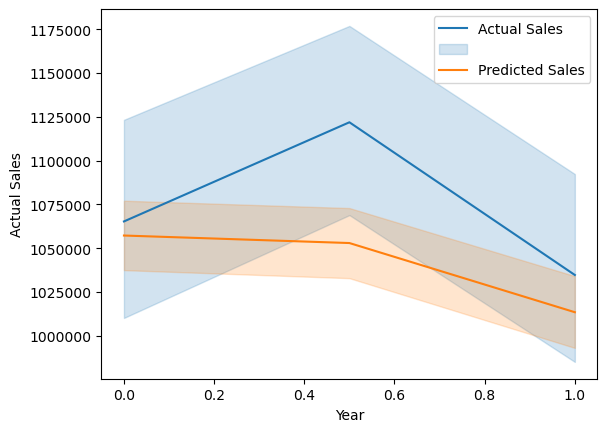

In [135]:
sns.lineplot(Comparison, x = 'Year',y = 'Actual Sales')
sns.lineplot(Comparison, x = 'Year',y = 'Predicted Sales')
plt.ticklabel_format(useOffset=False,style='plain',axis='y')
plt.legend(['Actual Sales','','Predicted Sales'])
plt.show()

In [136]:
from sklearn.model_selection import cross_val_score
linear_scores = cross_val_score(linear_model,x_train,y_train,cv=10)
np.mean(linear_scores)

0.1442580974062706

In [137]:
rf_model = RandomForestRegressor()
rf_model.fit(x_train,y_train)
rf_pred = rf_model.predict(x_test)

In [138]:
evaluation_metrics(y_test,rf_pred)

Mean Squared Error = 15104996731.129007
Mean Absolute Error = 69184.29240186482
Root Mean Squared Error = 122902.38700338171
r2 score = 0.9531181845466414


In [139]:
Comparison = x_test.copy("deep")
Comparison['Actual Sales'] = y_test
Comparison['Predicted Sales'] = rf_pred
Comparison.head()

Store  Holiday_Flag  Temperature  Fuel_Price       CPI  Unemployment  \
4908  0.772727           0.0     0.326810    0.335170  0.104116      0.468085   
1183  0.181818           0.0     0.594423    0.108717  0.884092      0.256948   
909   0.136364           0.0     0.119080    0.268537  0.648460      0.473356   
3126  0.477273           0.0     0.671429    0.606713  0.158797      0.363427   
5840  0.909091           0.0     0.557241    0.667335  0.706983      0.255703   

      Year     Month      Week  Actual Sales  Predicted Sales  
4908   0.0  1.000000  0.980392    1779236.54     1.117117e+06  
1183   0.0  0.363636  0.352941     517869.97     5.262969e+05  
909    0.5  0.000000  0.058824     513372.17     5.683615e+05  
3126   1.0  0.454545  0.450980    1061219.19     1.033324e+06  
5840   1.0  0.363636  0.392157    1424500.47     1.348075e+06

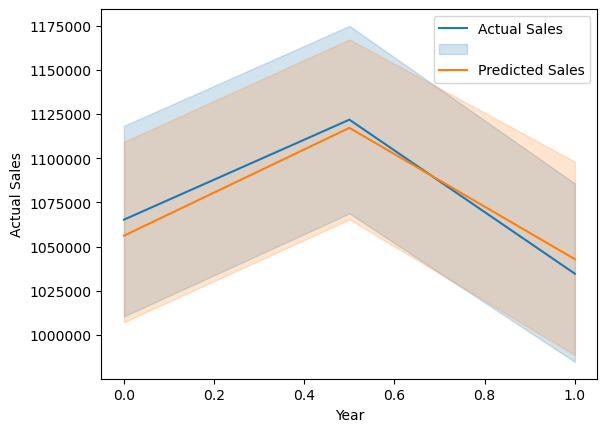

In [140]:
sns.lineplot(Comparison, x = 'Year',y = 'Actual Sales')
sns.lineplot(Comparison, x = 'Year',y = 'Predicted Sales')
plt.ticklabel_format(useOffset=False,style='plain',axis='y')
plt.legend(['Actual Sales','','Predicted Sales'])
plt.show()

In [141]:
rf_scores = cross_val_score(rf_model,x_train,y_train,cv=10)
np.mean(rf_scores)

0.9470905776362825

In [142]:
xgb_model = XGBRegressor()
xgb_model.fit(x_train,y_train)
xgb_pred = xgb_model.predict(x_test)

In [143]:
evaluation_metrics(y_test,xgb_pred)

Mean Squared Error = 8085810181.811125
Mean Absolute Error = 55308.67085591491
Root Mean Squared Error = 89921.13312125868
r2 score = 0.9749038369565921


In [144]:
Comparison = x_test.copy("deep")
Comparison['Actual Sales'] = y_test
Comparison['Predicted Sales'] = xgb_pred
Comparison.head()

Store  Holiday_Flag  Temperature  Fuel_Price       CPI  Unemployment  \
4908  0.772727           0.0     0.326810    0.335170  0.104116      0.468085   
1183  0.181818           0.0     0.594423    0.108717  0.884092      0.256948   
909   0.136364           0.0     0.119080    0.268537  0.648460      0.473356   
3126  0.477273           0.0     0.671429    0.606713  0.158797      0.363427   
5840  0.909091           0.0     0.557241    0.667335  0.706983      0.255703   

      Year     Month      Week  Actual Sales  Predicted Sales  
4908   0.0  1.000000  0.980392    1779236.54     1.643442e+06  
1183   0.0  0.363636  0.352941     517869.97     5.254057e+05  
909    0.5  0.000000  0.058824     513372.17     5.049055e+05  
3126   1.0  0.454545  0.450980    1061219.19     1.044295e+06  
5840   1.0  0.363636  0.392157    1424500.47     1.355409e+06

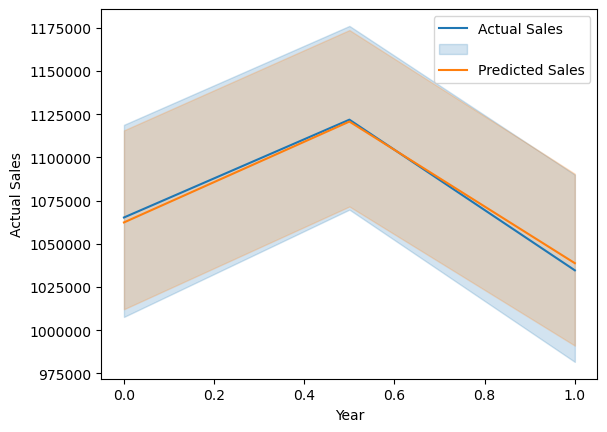

In [145]:
sns.lineplot(Comparison, x = 'Year',y = 'Actual Sales')
sns.lineplot(Comparison, x = 'Year',y = 'Predicted Sales')
plt.ticklabel_format(useOffset=False,style='plain',axis='y')
plt.legend(['Actual Sales','','Predicted Sales'])
plt.show()

In [146]:
xgb_scores = cross_val_score(xgb_model,x_train,y_train,cv=10)
np.mean(xgb_scores)

0.9725617642289255

In [147]:
pip install prophet

Note: you may need to restart the kernel to use updated packages.


In [148]:
time_data = data[['Date','Weekly_Sales']]
time_data.columns = ['ds','y']
time_data.head()

ds           y
0 2010-05-02  1643690.90
1 2010-12-02  1641957.44
2 2010-02-19  1611968.17
3 2010-02-26  1409727.59
4 2010-05-03  1554806.68

In [149]:
data.columns

Index(['Store', 'Date', 'Weekly_Sales', 'Holiday_Flag', 'Temperature',
       'Fuel_Price', 'CPI', 'Unemployment', 'Year', 'Month', 'MonthName',
       'Week'],
      dtype='object')

In [150]:
regressors_df = data[['Date','Holiday_Flag','Temperature','Fuel_Price','CPI','Unemployment']]
regressors_df = regressors_df.rename(columns={'Date':'ds'})
merged_df = pd.merge(time_data,regressors_df,on='ds',how='left')

In [151]:
merged_df.head()

ds          y  Holiday_Flag  Temperature  Fuel_Price         CPI  \
0 2010-05-02  1643690.9             0        42.31       2.572  211.096358   
1 2010-05-02  1643690.9             0        40.19       2.572  210.752605   
2 2010-05-02  1643690.9             0        45.71       2.572  214.424881   
3 2010-05-02  1643690.9             0        43.76       2.598  126.442065   
4 2010-05-02  1643690.9             0        39.70       2.572  211.653972   

   Unemployment  
0         8.106  
1         8.324  
2         7.368  
3         8.623  
4         6.566

In [152]:
from prophet import Prophet
m = Prophet(daily_seasonality=True)
m.add_regressor('Holiday_Flag')
m.add_regressor('Temperature')
m.add_regressor('Fuel_Price')
m.add_regressor('CPI')
m.add_regressor('Unemployment')
model_fit = m.fit(merged_df)



In [153]:
forecast = model_fit.predict(merged_df)
forecast[['ds','yhat','Holiday_Flag','Temperature','Fuel_Price','CPI','Unemployment']].tail()

ds          yhat  Holiday_Flag  Temperature   Fuel_Price  \
289570 2012-12-10  1.117858e+06           0.0 -5193.168219 -7515.373780   
289571 2012-12-10  1.124981e+06           0.0 -4321.093178 -1642.046552   
289572 2012-12-10  1.128725e+06           0.0  6242.267404 -4541.451458   
289573 2012-12-10  1.131610e+06           0.0  7254.999711 -4541.451458   
289574 2012-12-10  1.128399e+06           0.0   339.350861 -1655.595173   

                CPI  Unemployment  
289570 -1273.575777   1376.466424  
289571  1588.354174  -1108.226067  
289572 -1028.007111  -2411.578991  
289573 -1028.007111   -538.830407  
289574 -1273.575777    525.501481

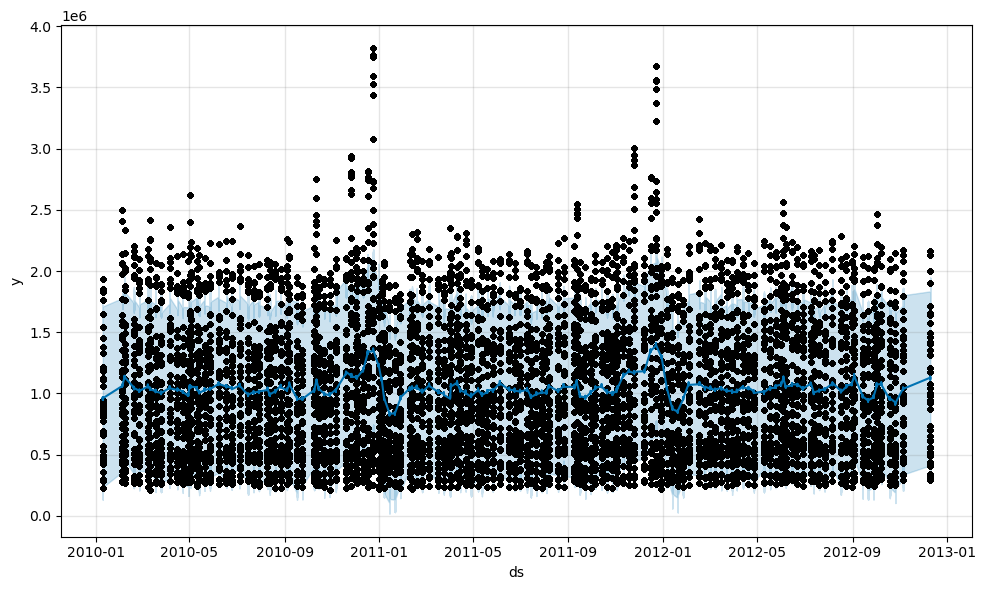

In [154]:
model_fit.plot(forecast);

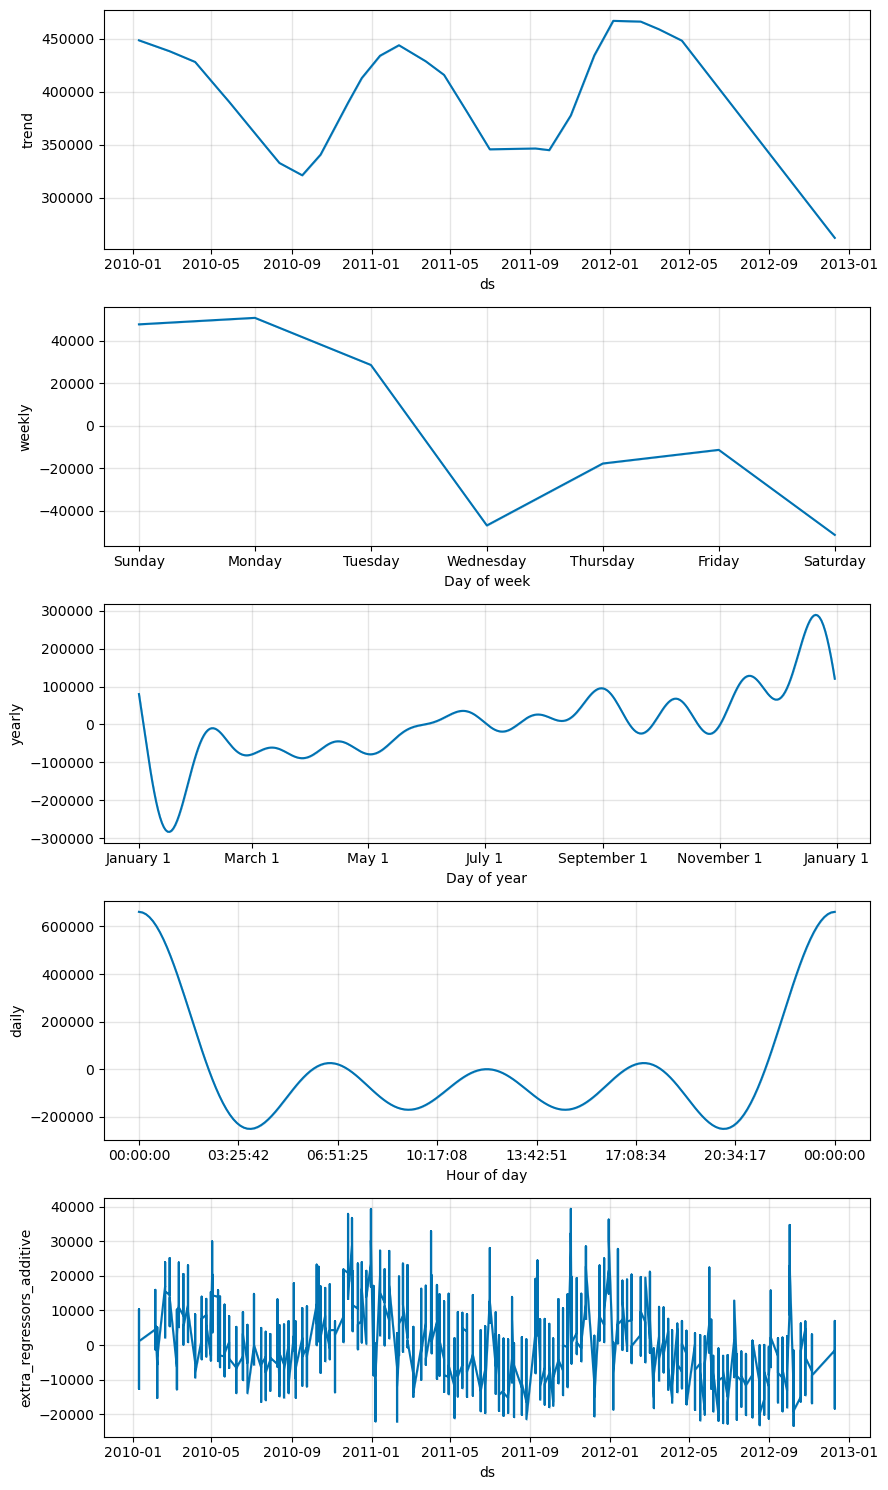

In [155]:
model_fit.plot_components(forecast);

In [156]:
predictions = forecast[['ds','yhat']]
predictions = predictions.rename(columns = {'ds':'Date','yhat':'Weekly_Sales'})
predictions.head()

Date   Weekly_Sales
0 2010-01-10  959669.097563
1 2010-01-10  952542.371109
2 2010-01-10  959177.961275
3 2010-01-10  959421.836454
4 2010-01-10  958426.013618

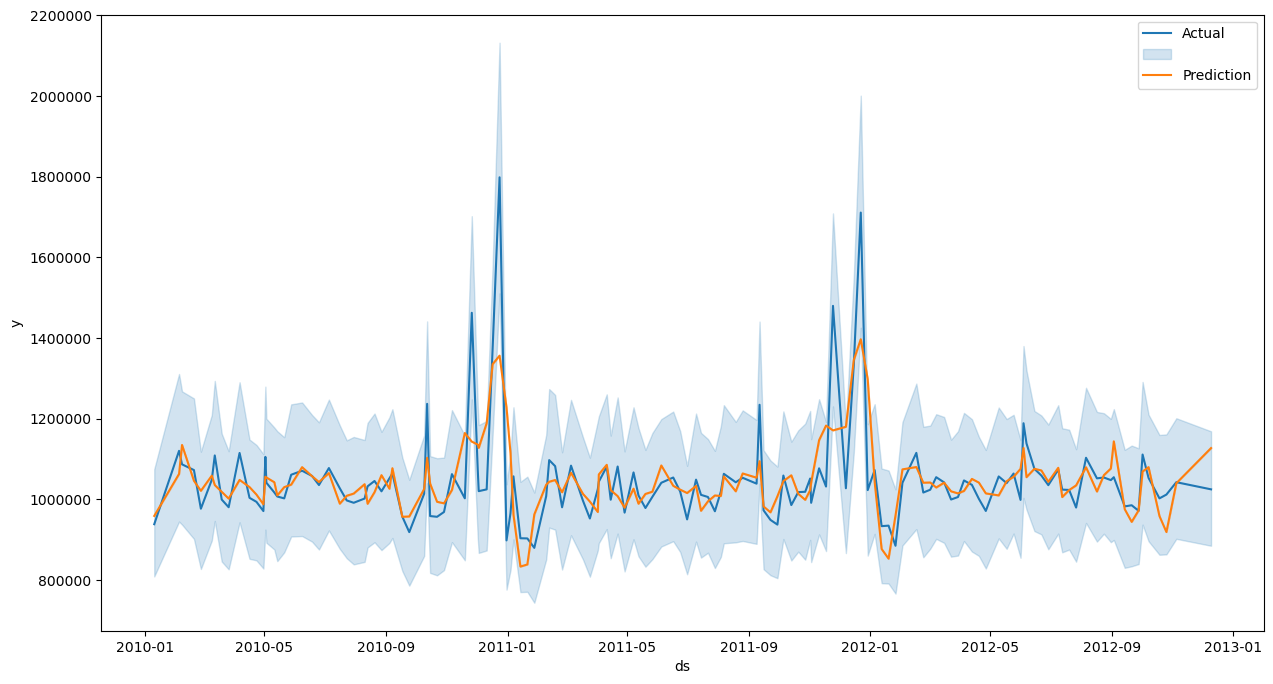

In [157]:
plt.subplots(figsize = (15,8))
sns.lineplot(time_data,x = 'ds',y='y',legend='full')
sns.lineplot(predictions,x = 'Date',y = 'Weekly_Sales',legend='full')
plt.legend(labels = ['Actual','','Prediction'])
plt.ticklabel_format(useOffset=False,style='plain',axis='y')
plt.show()

In [158]:
predictions['Date'] = pd.to_datetime(predictions['Date'])
predictions['Year'] = predictions['Date'].dt.year
predictions['Month'] = predictions['Date'].dt.month
predictions['MonthName'] = predictions['Date'].dt.month_name()
predictions['Week'] = predictions['Date'].dt.week


In [159]:
predictions.head()

Date   Weekly_Sales  Year  Month MonthName  Week
0 2010-01-10  959669.097563  2010      1   January     1
1 2010-01-10  952542.371109  2010      1   January     1
2 2010-01-10  959177.961275  2010      1   January     1
3 2010-01-10  959421.836454  2010      1   January     1
4 2010-01-10  958426.013618  2010      1   January     1

In [160]:
predictions.shape

(289575, 6)

In [161]:
x_time  = predictions.drop(columns=['Date','Weekly_Sales','MonthName'])
y_time = predictions[['Weekly_Sales']]

In [162]:
x_time_train,x_time_test,y_time_train,y_time_test = train_test_split(x_time,y_time,test_size=0.2,random_state=20)

In [163]:
xgb_time_model = XGBRegressor()
xgb_time_model.fit(x_time_train,y_time_train)
xgb_time_pred = xgb_time_model.predict(x_time_test)

In [164]:
x_time_train.shape,y_time_train.shape,x_time_test.shape,y_time_test.shape,xgb_time_pred.shape

((231660, 3), (231660, 1), (57915, 3), (57915, 1), (57915,))

In [165]:
evaluation_metrics(y_time_test,xgb_time_pred)

Mean Squared Error = 282901110.26778686
Mean Absolute Error = 8999.90979661444
Root Mean Squared Error = 16819.664392245966
r2 score = 0.9597170032438203


In [166]:
Comparison = x_time_test.copy("deep")
Comparison['Actual Sales'] = y_time_test
Comparison['Predicted Sales'] = xgb_time_pred
Comparison.head()

Year  Month  Week  Actual Sales  Predicted Sales
251272  2012      6    26  1.047577e+06     1.043718e+06
212922  2012      2     7  1.085759e+06     1.080340e+06
155918  2011      7    29  9.873993e+05     9.953164e+05
234202  2012      4    17  1.011260e+06     1.015083e+06
216083  2012      2     8  1.038592e+06     1.041570e+06

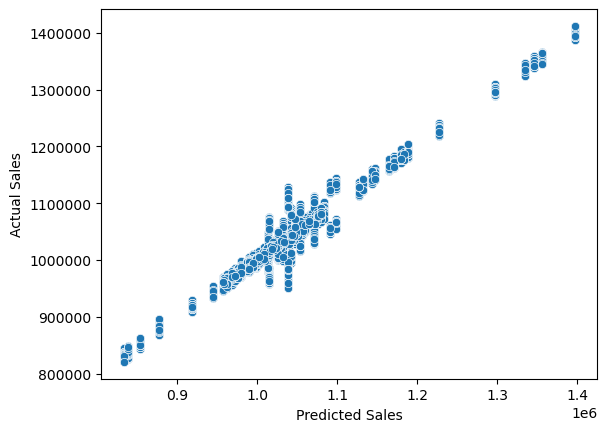

In [167]:
sns.scatterplot(Comparison,x='Predicted Sales',y='Actual Sales')
plt.ticklabel_format(useOffset=False,style='plain',axis='y')
plt.show()

In [168]:
xgb_time_scores = cross_val_score(xgb_time_model,x_time_train,y_time_train,cv=10)
np.mean(xgb_time_scores)

0.9592478891706511

In [169]:
m2 = Prophet(daily_seasonality=True)
m2.fit(time_data)
future = m2.make_future_dataframe(periods = 84)
future.tail(10)

ds
217 2013-02-23
218 2013-02-24
219 2013-02-25
220 2013-02-26
221 2013-02-27
222 2013-02-28
223 2013-03-01
224 2013-03-02
225 2013-03-03
226 2013-03-04

In [170]:
forecast2 = m2.predict(future)
forecast2[['ds','yhat','yhat_upper','yhat_lower']].tail()

ds          yhat    yhat_upper     yhat_lower
222 2013-02-28  1.005490e+06  1.704235e+06  262138.468394
223 2013-03-01  1.003714e+06  1.715118e+06  301896.198322
224 2013-03-02  9.676288e+05  1.629810e+06  219683.903636
225 2013-03-03  1.054530e+06  1.803347e+06  304561.236069
226 2013-03-04  1.057696e+06  1.755902e+06  356331.453199

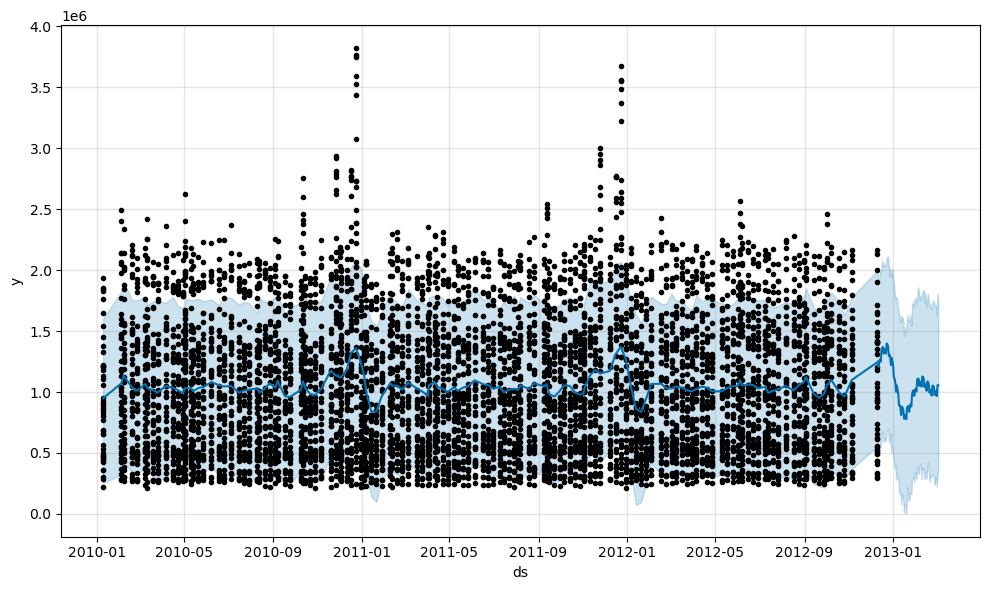

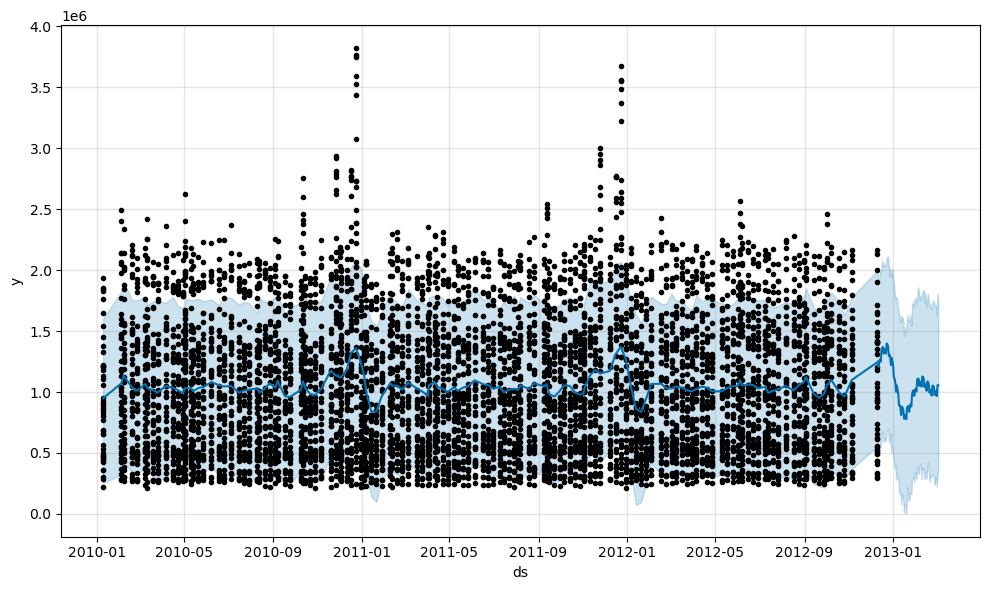

In [171]:
m2.plot(forecast2);

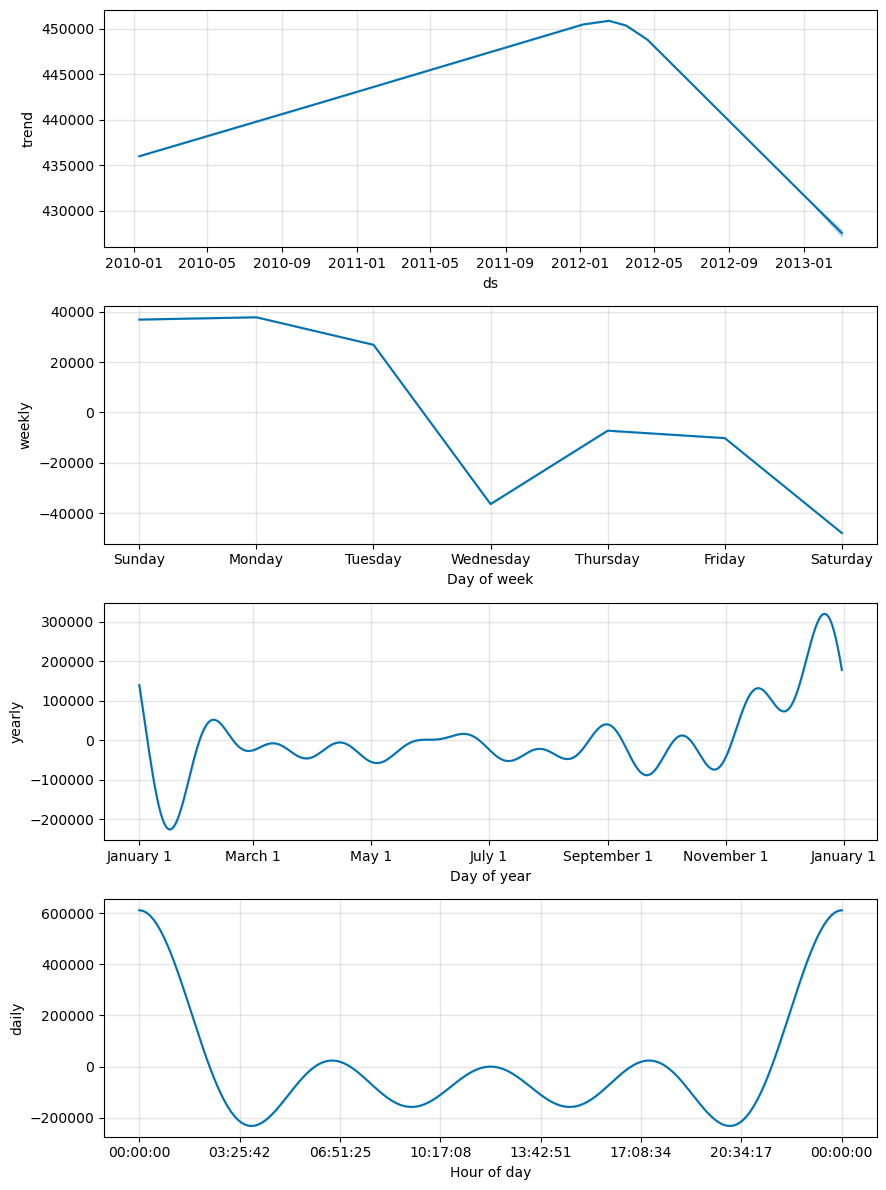

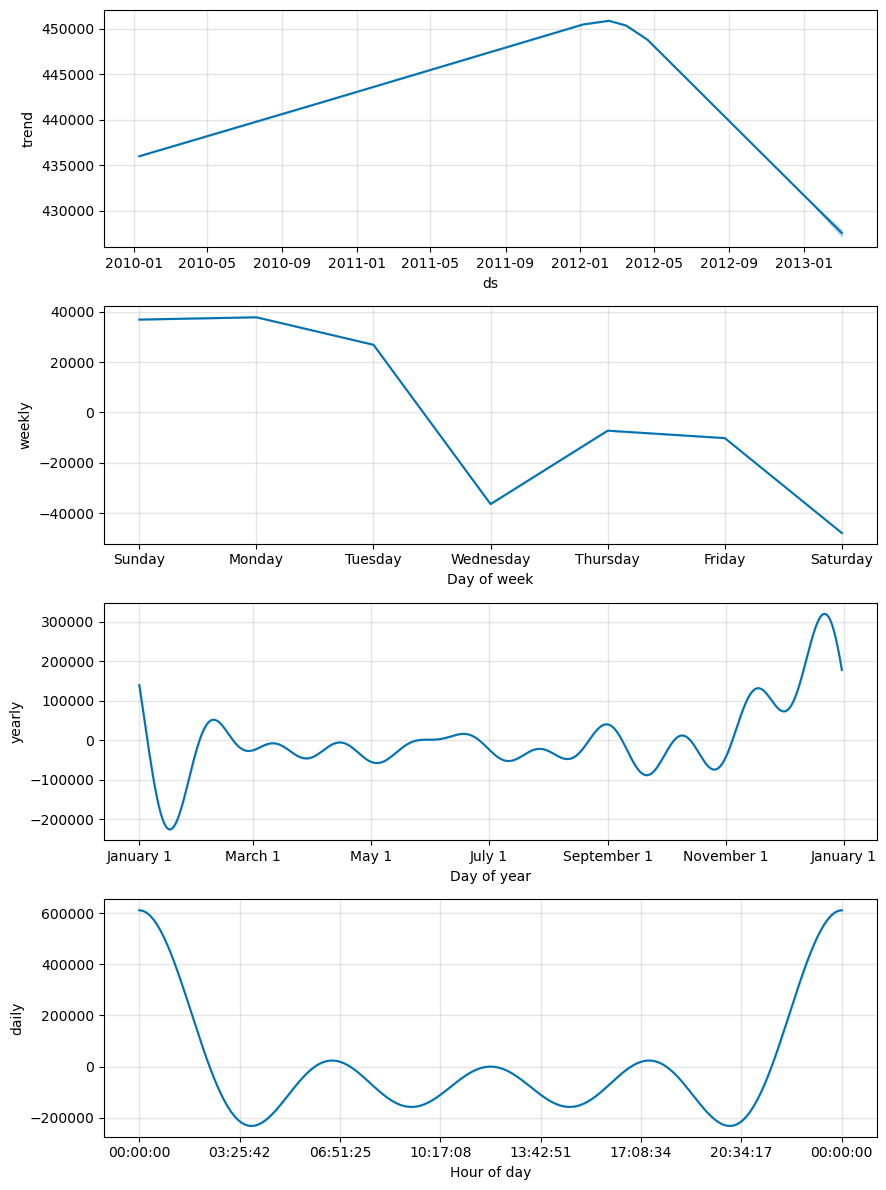

In [172]:
m2.plot_components(forecast2);